In [3]:
import math
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from random import randrange
from scipy.integrate import simps


# PREPARE A DF

In [4]:
dff=pd.read_csv("merged_2021.csv", sep=',')
dff.drop_duplicates(subset=['0', '1'], keep='first', inplace=True)
dff = dff.dropna()
pd.set_option("display.max.columns", None)

dff=dff[['0','1','3','15','33']]



dff = dff.rename(columns={'0': 'Date', '1': 'Time', '3': 'Temperature', '15': 'Wind Speed', '33': 'Wind Direction'})
dff["DATE_TIME"] = pd.to_datetime(dff["Date"] + " " + dff["Time"], format='mixed', dayfirst=True)

dff[['year_month_hday','Hour_minute']] = dff['DATE_TIME'].astype(str).str.split(' ', expand=True).astype(str)
dff[['Hour','Minute','Second']] = dff['Hour_minute'].astype(str).str.split(':', expand=True).astype(str)
dff[['Year','Month','Day']] = dff['year_month_hday'].astype(str).str.split('-', expand=True).astype(str)
dff


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\902498367.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  dff=pd.read_csv("merged_2021.csv", sep=',')


Date      Time  Temperature  Wind Speed  Wind Direction  \
0        01.01.2021  00:00:09         -1.7         2.9           153.0   
1        01.01.2021  00:00:19         -1.7         2.8           162.0   
2        01.01.2021  00:00:29         -1.7         2.8           153.0   
3        01.01.2021  00:00:39         -1.7         2.8           158.0   
4        01.01.2021  00:00:49         -1.7         2.7           147.0   
...             ...       ...          ...         ...             ...   
2873888  14.12.2021  10:01:20          2.6         1.3           237.0   
2873889  14.12.2021  10:01:31          2.6         1.3           240.0   
2873890  14.12.2021  10:01:40          2.6         1.3           244.0   
2873891  14.12.2021  10:01:50          2.6         1.3           245.0   
2873892  14.12.2021  10:02:00          2.6         1.3           247.0   

                  DATE_TIME year_month_hday Hour_minute Hour Minute Second  \
0       2021-01-01 00:00:09      2021-01-01    00:00:09   00     00     09   
1       2021-01-01 00:00:19      2021-01-01    00:00:19   00     00     19   
2       2021-01-01 00:00:29      2021-01-01    00:00:29   00     00     29   
3       2021-01-01 00:00:39      2021-01-01    00:00:39   00     00     39   
4       2021-01-01 00:00:49      2021-01-01    00:00:49   00     00     49   
...                     ...             ...         ...  ...    ...    ...   
2873888 2021-12-14 10:01:20      2021-12-14    10:01:20   10     01     20   
2873889 2021-12-14 10:01:31      2021-12-14    10:01:31   10     01     31   
2873890 2021-12-14 10:01:40      2021-12-14    10:01:40   10     01     40   
2873891 2021-12-14 10:01:50      2021-12-14    10:01:50   10     01     50   
2873892 2021-12-14 10:02:00      2021-12-14    10:02:00   10     02     00   

         Year Month Day  
0        2021    01  01  
1        2021    01  01  
2        2021    01  01  
3        2021    01  01  
4        2021    01  01  
...       ...   ...  ..  
2873888  2021    12  14  
2873889  2021    12  14  
2873890  2021    12  14  
2873891  2021    12  14  
2873892  2021    12  14  

[2823511 rows x 14 columns]

dff=pd.read_csv("merged_2021.csv", sep=',')
dff.drop_duplicates(subset=['0', '1'], keep='first', inplace=True)
dff = dff.dropna()
pd.set_option("display.max.columns", None)

dff=dff[['0','1','3','15','33']]



dff = dff.rename(columns={'0': 'Date', '1': 'Time', '3': 'Temperature', '15': 'Wind Speed', '33': 'Wind Direction'})

dff

dff["DATE_TIME"] =pd.to_datetime(dff['Date'] + ' ' + dff['Time'])
dff

dff[['year_month_hday','Hour_minute']] = dff['DATE_TIME'].astype(str).str.split(' ', expand=True).astype(str)
dff[['Hour','Minute','Second']] = dff['Hour_minute'].astype(str).str.split(':', expand=True).astype(str)
dff[['Year','Month','Day']] = dff['year_month_hday'].astype(str).str.split('-', expand=True).astype(str)
dff

In [5]:
df = dff.copy()

In [6]:
df=df[['DATE_TIME','Month','Day','Hour','Minute','Temperature','Wind Speed', 'Wind Direction']]
df['Wind Speed'] = df['Wind Speed'].round()
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df

DATE_TIME Month Day Hour Minute  Temperature  Wind Speed  \
0       2021-01-01 00:00:09    01  01   00     00         -1.7         3.0   
1       2021-01-01 00:00:19    01  01   00     00         -1.7         3.0   
2       2021-01-01 00:00:29    01  01   00     00         -1.7         3.0   
3       2021-01-01 00:00:39    01  01   00     00         -1.7         3.0   
4       2021-01-01 00:00:49    01  01   00     00         -1.7         3.0   
...                     ...   ...  ..  ...    ...          ...         ...   
2873888 2021-12-14 10:01:20    12  14   10     01          2.6         1.0   
2873889 2021-12-14 10:01:31    12  14   10     01          2.6         1.0   
2873890 2021-12-14 10:01:40    12  14   10     01          2.6         1.0   
2873891 2021-12-14 10:01:50    12  14   10     01          2.6         1.0   
2873892 2021-12-14 10:02:00    12  14   10     02          2.6         1.0   

         Wind Direction  
0                 153.0  
1                 162.0  
2                 153.0  
3                 158.0  
4                 147.0  
...                 ...  
2873888           237.0  
2873889           240.0  
2873890           244.0  
2873891           245.0  
2873892           247.0  

[2823511 rows x 8 columns]

In [7]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
    
    
# Apply the function and calculate 'Wind Speed Top' based on season
df['Month'] = df['DATE_TIME'].dt.month
df['Season'] = df['Month'].apply(get_season)
df['Wind Speed Top'] = df['Wind Speed'].copy()
df.loc[df['Season'] == 'winter', 'Wind Speed Top'] *= 2.5
df.loc[df['Season'] == 'summer', 'Wind Speed Top'] *= 1.625
df.loc[df['Season'] == 'autumn', 'Wind Speed Top'] *= 1.83
df.loc[df['Season'] == 'spring', 'Wind Speed Top'] *= 2.28

# Drop the additional columns
df.drop(['Month', 'Season'], axis=1, inplace=True)

df
    


DATE_TIME Day Hour Minute  Temperature  Wind Speed  \
0       2021-01-01 00:00:09  01   00     00         -1.7         3.0   
1       2021-01-01 00:00:19  01   00     00         -1.7         3.0   
2       2021-01-01 00:00:29  01   00     00         -1.7         3.0   
3       2021-01-01 00:00:39  01   00     00         -1.7         3.0   
4       2021-01-01 00:00:49  01   00     00         -1.7         3.0   
...                     ...  ..  ...    ...          ...         ...   
2873888 2021-12-14 10:01:20  14   10     01          2.6         1.0   
2873889 2021-12-14 10:01:31  14   10     01          2.6         1.0   
2873890 2021-12-14 10:01:40  14   10     01          2.6         1.0   
2873891 2021-12-14 10:01:50  14   10     01          2.6         1.0   
2873892 2021-12-14 10:02:00  14   10     02          2.6         1.0   

         Wind Direction  Wind Speed Top  
0                 153.0             7.5  
1                 162.0             7.5  
2                 153.0             7.5  
3                 158.0             7.5  
4                 147.0             7.5  
...                 ...             ...  
2873888           237.0             2.5  
2873889           240.0             2.5  
2873890           244.0             2.5  
2873891           245.0             2.5  
2873892           247.0             2.5  

[2823511 rows x 8 columns]

In [8]:
latitude = 42.27
longitude = 42.45

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

df['Zenith_Angle'] = df['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
df['Solar Panel Power'] = df['Zenith_Angle'].apply(calculate_relative_power)    
df   

DATE_TIME Day Hour Minute  Temperature  Wind Speed  \
0       2021-01-01 00:00:09  01   00     00         -1.7         3.0   
1       2021-01-01 00:00:19  01   00     00         -1.7         3.0   
2       2021-01-01 00:00:29  01   00     00         -1.7         3.0   
3       2021-01-01 00:00:39  01   00     00         -1.7         3.0   
4       2021-01-01 00:00:49  01   00     00         -1.7         3.0   
...                     ...  ..  ...    ...          ...         ...   
2873888 2021-12-14 10:01:20  14   10     01          2.6         1.0   
2873889 2021-12-14 10:01:31  14   10     01          2.6         1.0   
2873890 2021-12-14 10:01:40  14   10     01          2.6         1.0   
2873891 2021-12-14 10:01:50  14   10     01          2.6         1.0   
2873892 2021-12-14 10:02:00  14   10     02          2.6         1.0   

         Wind Direction  Wind Speed Top  Zenith_Angle  Solar Panel Power  
0                 153.0             7.5    159.498642           0.000000  
1                 162.0             7.5    159.510509           0.000000  
2                 153.0             7.5    159.522326           0.000000  
3                 158.0             7.5    159.534090           0.000000  
4                 147.0             7.5    159.545802           0.000000  
...                 ...             ...           ...                ...  
2873888           237.0             2.5     74.405762           0.268823  
2873889           240.0             2.5     74.385810           0.269158  
2873890           244.0             2.5     74.369500           0.269433  
2873891           245.0             2.5     74.351392           0.269737  
2873892           247.0             2.5     74.333299           0.270041  

[2823511 rows x 10 columns]

In [9]:
import pandas as pd

# Assuming the dataframe is named 'df'
# Assuming the wind speed column is named 'Wind Speed' and the wind direction column is named 'Wind Direction'

# Define a function to calculate wind turbine power
def calculate_power(wind_speed):
    if wind_speed < 4 or wind_speed > 25:
        return 0
    elif wind_speed >= 4 and wind_speed < 12:
        return (wind_speed - 3.5) / (12 - 3.5) * 1
    else:
        return 1

# Apply the function to the 'Wind Speed' column to calculate the power
df['Wind Turbine Power'] = df['Wind Speed Top'].apply(calculate_power)

# Print the updated dataframe with the added 'Turbine Power' column
df

DATE_TIME Day Hour Minute  Temperature  Wind Speed  \
0       2021-01-01 00:00:09  01   00     00         -1.7         3.0   
1       2021-01-01 00:00:19  01   00     00         -1.7         3.0   
2       2021-01-01 00:00:29  01   00     00         -1.7         3.0   
3       2021-01-01 00:00:39  01   00     00         -1.7         3.0   
4       2021-01-01 00:00:49  01   00     00         -1.7         3.0   
...                     ...  ..  ...    ...          ...         ...   
2873888 2021-12-14 10:01:20  14   10     01          2.6         1.0   
2873889 2021-12-14 10:01:31  14   10     01          2.6         1.0   
2873890 2021-12-14 10:01:40  14   10     01          2.6         1.0   
2873891 2021-12-14 10:01:50  14   10     01          2.6         1.0   
2873892 2021-12-14 10:02:00  14   10     02          2.6         1.0   

         Wind Direction  Wind Speed Top  Zenith_Angle  Solar Panel Power  \
0                 153.0             7.5    159.498642           0.000000   
1                 162.0             7.5    159.510509           0.000000   
2                 153.0             7.5    159.522326           0.000000   
3                 158.0             7.5    159.534090           0.000000   
4                 147.0             7.5    159.545802           0.000000   
...                 ...             ...           ...                ...   
2873888           237.0             2.5     74.405762           0.268823   
2873889           240.0             2.5     74.385810           0.269158   
2873890           244.0             2.5     74.369500           0.269433   
2873891           245.0             2.5     74.351392           0.269737   
2873892           247.0             2.5     74.333299           0.270041   

         Wind Turbine Power  
0                  0.470588  
1                  0.470588  
2                  0.470588  
3                  0.470588  
4                  0.470588  
...                     ...  
2873888            0.000000  
2873889            0.000000  
2873890            0.000000  
2873891            0.000000  
2873892            0.000000  

[2823511 rows x 11 columns]

In [11]:
df=df[['DATE_TIME','Day','Hour','Minute','Temperature','Wind Direction', 'Wind Speed', 'Wind Speed Top', 'Solar Panel Power', 'Wind Turbine Power']]
df

DATE_TIME Day Hour Minute  Temperature  Wind Direction  \
0       2021-01-01 00:00:09  01   00     00         -1.7           153.0   
1       2021-01-01 00:00:19  01   00     00         -1.7           162.0   
2       2021-01-01 00:00:29  01   00     00         -1.7           153.0   
3       2021-01-01 00:00:39  01   00     00         -1.7           158.0   
4       2021-01-01 00:00:49  01   00     00         -1.7           147.0   
...                     ...  ..  ...    ...          ...             ...   
2873888 2021-12-14 10:01:20  14   10     01          2.6           237.0   
2873889 2021-12-14 10:01:31  14   10     01          2.6           240.0   
2873890 2021-12-14 10:01:40  14   10     01          2.6           244.0   
2873891 2021-12-14 10:01:50  14   10     01          2.6           245.0   
2873892 2021-12-14 10:02:00  14   10     02          2.6           247.0   

         Wind Speed  Wind Speed Top  Solar Panel Power  Wind Turbine Power  
0               3.0             7.5           0.000000            0.470588  
1               3.0             7.5           0.000000            0.470588  
2               3.0             7.5           0.000000            0.470588  
3               3.0             7.5           0.000000            0.470588  
4               3.0             7.5           0.000000            0.470588  
...             ...             ...                ...                 ...  
2873888         1.0             2.5           0.268823            0.000000  
2873889         1.0             2.5           0.269158            0.000000  
2873890         1.0             2.5           0.269433            0.000000  
2873891         1.0             2.5           0.269737            0.000000  
2873892         1.0             2.5           0.270041            0.000000  

[2823511 rows x 10 columns]


df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-02-02').date()]

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()




hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_wind_power.index, hourly_avg_wind_power.values, marker='o', label='Wind Turbine Power')
plt.plot(hourly_avg_solar_power.index, hourly_avg_solar_power.values, marker='x', label='Solar Panel Power')
plt.xlabel('Hour')
plt.ylabel('Power Output')
plt.title('Wind Turbine Power and Solar Panel Power VS Hour for 2021-03-05')
plt.legend()
plt.grid(True)

plt.xlim(0, 23)  # Set the x-axis limits from 0 to 24
plt.xticks(range(0, 24, 1))  # Set x-axis ticks with interval of 1 from 0 to 24
plt.show()

In [13]:
data = {
    'Hour': list(range(0, 24)),
    'Winter Load': [17.42, 16.58, 16.22, 16.10, 16.10, 16.22, 17.03, 18.49, 19.05, 19.37, 19.26, 19.06, 
                    19.08, 18.93, 19.08, 19.31, 19.70, 20.22, 20.80, 20.15, 19.92, 19.73, 19.13, 18.51]
}
winter_load_df = pd.DataFrame(data)



dataa = {
    'Hour': list(range(24)),
    'Summer Load': [17.19, 16.11, 15.78, 15.45, 15.30, 15.38, 15.98, 17.12, 17.89, 19.62, 20.45, 20.73, 20.53, 20.46, 20.83, 20.75, 20.61, 20.65, 20.55, 20.18, 20.10, 20.30, 19.78, 18.50]
}
summer_load_df = pd.DataFrame(dataa)

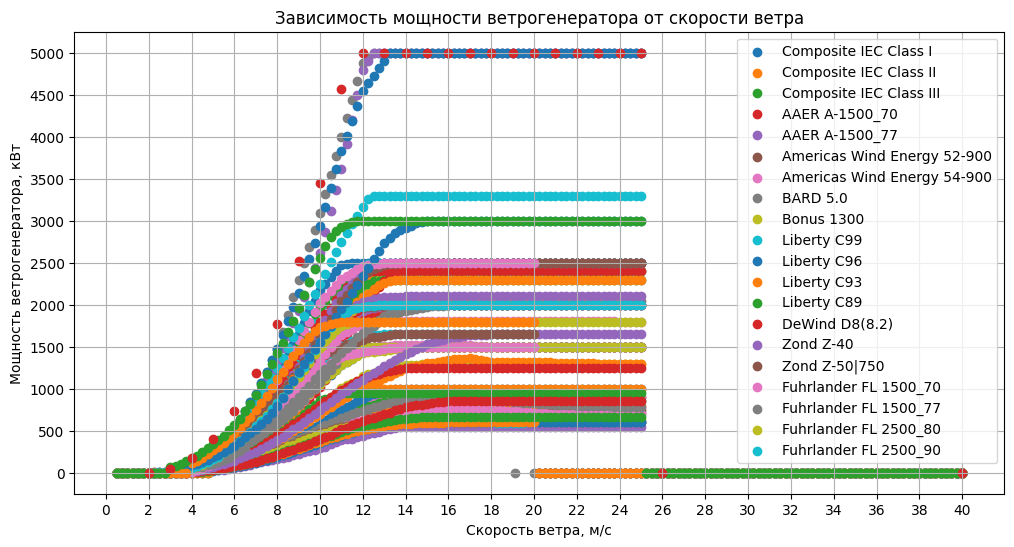

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Wind_Turbines_Data.csv', skiprows=[1, 2])
plt.figure(figsize=(12, 6))

num_turbines_plotted = 0  # Keep track of the number of turbines plotted

for idx, row in data.iterrows():
    wind_speeds = list(map(float, row['Wind Speed Array'].split('|')))[2:]  # Skip the first two values
    power_curve = list(map(float, row['Power Curve Array'].split('|')))[2:]  # Skip the first two values
    turbine_name = row['Name']
    kw_rating = row['KW Rating']
    rotor_diameter = row['Rotor Diameter']

    label = f'{turbine_name}'

    # Check if power at wind speed 10 m/s is greater than or equal to 500 kW
    rounded_wind_speeds = [round(speed) for speed in wind_speeds]
    index_of_10m_s = rounded_wind_speeds.index(15) if 15 in rounded_wind_speeds else None
    if index_of_10m_s is not None and power_curve[index_of_10m_s] >= 500:
        if num_turbines_plotted < 20:
            plt.scatter(wind_speeds, power_curve, label=label)
            num_turbines_plotted += 1
        else:
            plt.scatter(wind_speeds, power_curve)

plt.xlabel('Скорость ветра, м/с')
plt.ylabel('Мощность ветрогенератора, кВт')
plt.title('Зависимость мощности ветрогенератора от скорости ветра')
plt.xticks(range(0, 42, 2))
plt.yticks(range(0, 5500, 500))
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Filter data for the given day
df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-09-09').date()]

solar = 8.8
wind = 15.8
accumulation = 0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *= solar * (1 - accumulation)
hourly_avg_wind_power *= wind * (1 - accumulation)

month = pd.Timestamp('2021-08-08').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = simps(np.abs(difference))
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_tot = area_solar + area_wind
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

plt.figure(figsize=(10, 6))

plt.stackplot(hourly_avg_wind_power.index, [0]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
              labels=[f'Wind - {round(area_wind, 1)} GWh', f'Solar - {round(area_solar, 1)} GWh'],              
              colors=['blue', 'orange'])

plt.plot(hourly_avg_wind_power.index, total_power_output, color='purple',
         label=f'Total - {round(area_tot, 1)} GWh')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='red', linestyle='--',
         label=f'Demand - {round(area_load, 1)} GWh')

#plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
#         label=f'Natural Gas - {round(area_gas, 1)} GWh /')
plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
         label=f'Natural Gas - {round(area_gas, 1)} GWh')
plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
         label='Ramp rate, GW/h')
#plt.legend(["Label 1", "hg"])

# Marking the points on the Natural Gas graph
#for i in range(1, len(difference)):
#    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
#    y_diff = difference.values[i] - difference.values[i-1]
#    speed = y_diff / x_diff
#    #plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1], f'{round(speed, 2)}')
#    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1], f'{round(speed, 1)}', va='top', ha='right')
#    plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='gray')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}')
    plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='gray')

    plt.xlabel('Time [hour]')
plt.ylabel('Power [GW]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()

import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Filter data for each month
months = range(1, 13)
for month in months:
    df_month = df[df['DATE_TIME'].dt.month == month]

    solar = 8.8
    wind = 15.8
    accumulation = 0.15

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    plt.stackplot(hourly_avg_wind_power.index, [0]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'Wind - {round(area_wind, 1)} GWh', f'Solar - {round(area_solar, 1)} GWh'],              
                  colors=['blue', 'orange'])

    plt.plot(hourly_avg_wind_power.index, total_power_output, color='purple',
             label=f'Total - {round(area_tot, 1)} GWh')

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='red', linestyle='--',
             label=f'Demand - {round(area_load, 1)} GWh')

    plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
             label=f'Natural Gas - {round(area_gas, 1)} GWh')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
        y_diff = difference.values[i] - difference.values[i-1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}')
        plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='gray')

    plt.xlabel('Time [hour]')
    plt.ylabel('Power [GW]')
    plt.title(f'Power Generation and Demand for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.show()

import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Filter data for each month
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

for month_num, month_name in months.items():
    df_month = df[df['DATE_TIME'].dt.month == month_num]

    solar = 8.8
    wind = 15.8
    accumulation = 0.15

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month_num in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power
    difference = load_df['Winter Load' if month_num < 4 or month_num > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind
    area_load = simps(np.abs(load_df['Winter Load' if month_num < 4 or month_num > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    plt.stackplot(hourly_avg_wind_power.index, [0]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'Wind - {round(area_wind, 1)} GWh', f'Solar - {round(area_solar, 1)} GWh'],              
                  colors=['blue', 'orange'])

    plt.plot(hourly_avg_wind_power.index, total_power_output, color='purple',
             label=f'Total - {round(area_tot, 1)} GWh')

    plt.plot(load_df['Hour'], load_df['Winter Load' if month_num < 4 or month_num > 9 else 'Summer Load'], color='red', linestyle='--',
             label=f'Demand - {round(area_load, 1)} GWh')

    plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
             label=f'Natural Gas - {round(area_gas, 1)} GWh')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
        y_diff = difference.values[i] - difference.values[i-1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}')
        plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='gray')

    plt.xlabel('Time [hour]')
    plt.ylabel('Power [GW]')
    plt.title(f'Power Generation and Demand for {month_name}')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.show()

import calendar
import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Filter data for each month
months = range(1, 13)
for month in months:
    df_month = df[df['DATE_TIME'].dt.month == month]

    solar = 8.8
    wind = 15.8
    accumulation = 0.15

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    plt.stackplot(hourly_avg_wind_power.index, [0]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'Wind - {round(area_wind, 1)} GWh', f'Solar - {round(area_solar, 1)} GWh'],              
                  colors=['blue', 'orange'])

    plt.plot(hourly_avg_wind_power.index, total_power_output, color='purple',
             label=f'Total - {round(area_tot, 1)} GWh')

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='red', linestyle='--',
             label=f'Demand - {round(area_load, 1)} GWh')

    plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
             label=f'Natural Gas - {round(area_gas, 1)} GWh')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
        y_diff = difference.values[i] - difference.values[i-1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}')
        plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='gray')

    plt.xlabel('Time [hour]')
    plt.ylabel('Power [GW]')
    plt.title(f'Power Generation and Demand for {calendar.month_name[month]}')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.show()
    

import calendar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import simps

# Assuming df, summer_load_df, winter_load_df are defined dataframes

fig, axs = plt.subplots(3, 4, figsize=(22, 12))

for i, ax in enumerate(axs.flat):
    month_name = calendar.month_name[i+1]
    month = i + 1
    df_day = df[df['DATE_TIME'].dt.month == month]

    solar = 8.8
    wind = 15.8
    accumulation = 0.15

    df_day['Hour'] = df_day['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    ax.stackplot(hourly_avg_wind_power.index, [0]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                 labels=[f'Wind - {round(area_wind, 1)} GWh', f'Solar - {round(area_solar, 1)} GWh'],
                 colors=['blue', 'orange'])

    ax.plot(hourly_avg_wind_power.index, total_power_output, color='purple',
            label=f'Total - {round(area_tot, 1)} GWh')

    ax.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='red', linestyle='--',
            label=f'Demand - {round(area_load, 1)} GWh')

    ax.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--',
            label=f'Natural Gas - {round(area_gas, 1)} GWh')
    
    # Marking the points on the Natural Gas graph
    for j in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[j] - hourly_avg_wind_power.index[j-1]
        y_diff = difference.values[j] - difference.values[j-1]
        speed = y_diff / x_diff
        ax.text(hourly_avg_wind_power.index[j-1], difference.values[j-1], f'{round(speed, 1)}')
        ax.plot([hourly_avg_wind_power.index[j-1], hourly_avg_wind_power.index[j]], [difference.values[j-1], difference.values[j]], color='gray')

  
        
    # Additional formatting for each subplot
    ax.set_title(month_name)
    ax.set_xlabel('Time [hour]')
    ax.set_ylabel('Power [GW]')
    ax.grid(True)
    ax.set_xlim(0, 23)
    ax.set_xticks(range(0, 24, 1))
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\2062891966.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Hour'] = df_day['DATE_TIME'].dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\2062891966.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_gas = simps(np.abs(difference))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\2062891966.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_solar = simps(np.abs(hourly_avg_solar_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\2062891966.py:27: DeprecationWarning:

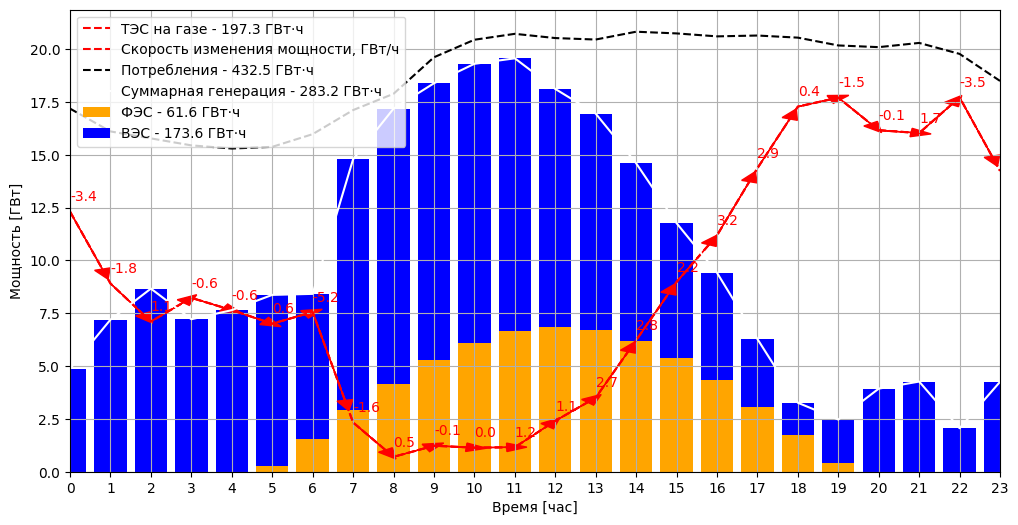

In [23]:
# Filter data for the given day
df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-05-16').date()]

nuclear=0
coal=0
solar=8.8
wind=15.8
accumulation=0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *=  solar*(1-accumulation)
hourly_avg_wind_power *=  wind*(1-accumulation)

month = pd.Timestamp('2021-06-06').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = simps(np.abs(difference))
area_coal = coal * 24
area_nuclear = nuclear * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_tot = area_solar + area_wind + area_nuclear+48
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
plt.figure(figsize=(12, 6))

power_sources = []

if coal > 0:
    coal_power = np.array([coal]*24)
    plt.bar(hourly_avg_wind_power.index, coal_power, label=f'ТЭС на угле - {round(area_coal, 1)} ГВт·ч', color='gray')
    power_sources.append('ТЭС на угле')

if nuclear > 0:
    plt.bar(hourly_avg_wind_power.index, [nuclear]*24, label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч', color='green')
    power_sources.append('АЭС')

plt.bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, label=f'ФЭС - {round(area_solar, 1)} ГВт·ч', color='orange')
plt.bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=hourly_avg_solar_power.values,
        label=f'ВЭС - {round(area_wind, 1)} ГВт·ч', color='blue')

plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
         label=f'Потребления - {round(area_load, 1)} ГВт·ч')

plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
         label=f'Суммарная генерация - {round(area_tot, 1)} ГВт·ч')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')
    
    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

#plt.title('2021-06-01')   
plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)  
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\224990996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Hour'] = df_day['DATE_TIME'].dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\224990996.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_gas = simps(np.abs(difference))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\224990996.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_solar = simps(np.abs(hourly_avg_solar_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\224990996.py:27: DeprecationWarning: 'sc

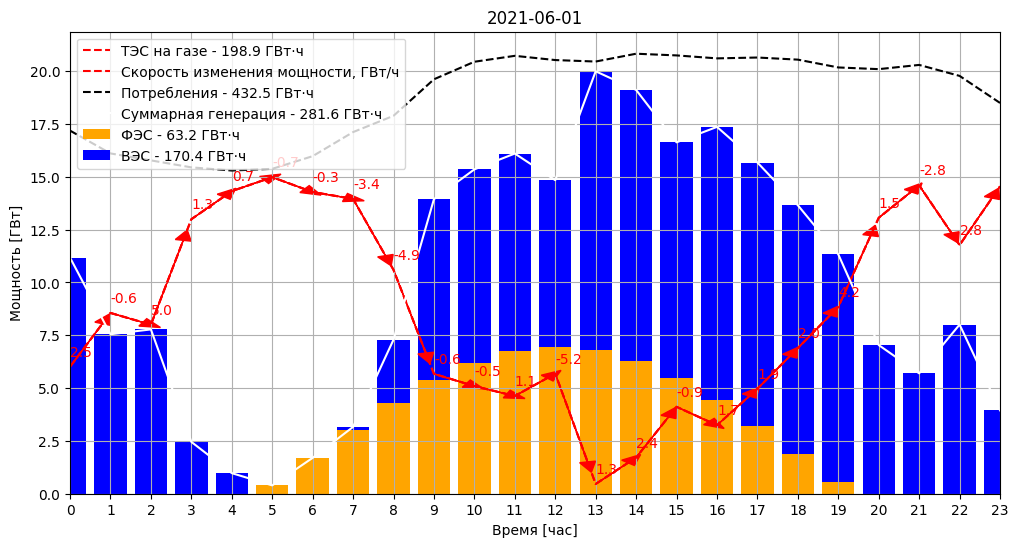

In [24]:
# Filter data for the given day
df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-05-24').date()]

nuclear=0
coal=0
solar=8.8
wind=15.8
accumulation=0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *=  solar*(1-accumulation)
hourly_avg_wind_power *=  wind*(1-accumulation)

month = pd.Timestamp('2021-06-06').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = simps(np.abs(difference))
area_coal = coal * 24
area_nuclear = nuclear * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_tot = area_solar + area_wind + area_nuclear+48
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
plt.figure(figsize=(12, 6))

power_sources = []

if coal > 0:
    coal_power = np.array([coal]*24)
    plt.bar(hourly_avg_wind_power.index, coal_power, label=f'ТЭС на угле - {round(area_coal, 1)} ГВт·ч', color='gray')
    power_sources.append('ТЭС на угле')

if nuclear > 0:
    plt.bar(hourly_avg_wind_power.index, [nuclear]*24, label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч', color='green')
    power_sources.append('АЭС')

plt.bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, label=f'ФЭС - {round(area_solar, 1)} ГВт·ч', color='orange')
plt.bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=hourly_avg_solar_power.values,
        label=f'ВЭС - {round(area_wind, 1)} ГВт·ч', color='blue')

plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
         label=f'Потребления - {round(area_load, 1)} ГВт·ч')

plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
         label=f'Суммарная генерация - {round(area_tot, 1)} ГВт·ч')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')
    
    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

plt.title('2021-06-01')   
plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)  
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Assuming df, summer_load_df, winter_load_df are defined and contain the necessary data

nuclear = 0
coal = 0
solar = 8.8
wind = 15.8
accumulation = 0.15

df['Hour'] = df['DATE_TIME'].dt.hour

for month in range(1, 13):
    df_month = df[df['DATE_TIME'].dt.month == month]
    
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_coal = coal * 24
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
    area_tot_gen=area_coal+area_nuclear+area_solar+area_wind

    plt.figure(figsize=(12, 6))

    power_sources = []

    if coal > 0:
        coal_power = np.array([coal]*24)
        plt.stackplot(hourly_avg_wind_power.index, coal_power, labels=[f'ТЭС на угле - {round(area_coal, 1)} ГВт·ч'], colors=['gray'])
        power_sources.append('ТЭС на угле')

    if nuclear > 0:
        plt.stackplot(hourly_avg_wind_power.index, [nuclear]*24, labels=[f'АЭС - {round(area_nuclear, 1)} ГВт·ч'], colors=['green'])
        power_sources.append('АЭС')

    plt.stackplot(hourly_avg_wind_power.index, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'ФЭС - {round(area_solar, 1)} ГВт·ч', f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
                  colors=['orange', 'blue'])

    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Скорость изменения мощности, ГВт/ч')

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
             label=f'Потребления - {round(area_load, 1)} ГВт·ч')

    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Суммарная генерация - {round(area_tot_gen, 1)} ГВт·ч')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
        y_diff = difference.values[i] - difference.values[i-1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')

        # Adding arrows for the speed change
        if speed > 0:
            plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')
        else:
            plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')

    month_names_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    plt.title(month_names_ru[month-1])
    plt.xlabel('Время [час]')
    plt.ylabel('Мощность [ГВт]')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', edgecolor='white')
    
    plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Assuming df, summer_load_df, winter_load_df are defined and contain the necessary data

nuclear = 0
coal = 0
solar = 8.8
wind = 15.8
accumulation = 0.15
has_power_consumption_hours = 5

df['Hour'] = df['DATE_TIME'].dt.hour

for month in range(1, 13):
    df_month = df[df['DATE_TIME'].dt.month == month]
    
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    has_consumption = np.repeat(0, 24)
    for i in range(24):
        max_difference = np.max(difference)
        if difference[i] == max_difference:
            has_consumption[i:min(i+has_power_consumption_hours, 24)] = 4
            break

    total_power_output -= has_consumption

    area_gas = simps(np.abs(difference))
    area_coal = coal * 24
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
    area_tot_gen = area_coal + area_nuclear + area_solar + area_wind

    plt.figure(figsize=(12, 6))

    power_sources = []

    # Plotting power sources and consumption
    if coal > 0:
        coal_power = np.array([coal]*24)
        plt.stackplot(hourly_avg_wind_power.index, coal_power, labels=[f'ТЭС на угле - {round(area_coal, 1)} ГВт·ч'], colors=['gray'])
        power_sources.append('ТЭС на угле')

    if nuclear > 0:
        plt.stackplot(hourly_avg_wind_power.index, [nuclear]*24, labels=[f'АЭС - {round(area_nuclear, 1)} ГВт·ч'], colors=['green'])
        power_sources.append('АЭС')

    plt.stackplot(hourly_avg_wind_power.index, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'ФЭС - {round(area_solar, 1)} ГВт·ч', f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
                  colors=['orange', 'blue'])

    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Скорость изменения мощности, ГВт/ч')

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',
             linestyle='--', label=f'Потребления - {round(area_load, 1)} ГВт·ч')

    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Суммарная генерация - {round(area_tot_gen, 1)} ГВт·ч')

    plt.plot(hourly_avg_wind_power.index, has_consumption, color='purple', linestyle='-.', label='HAS потребление')
    plt.fill_between(hourly_avg_wind_power.index, 0, has_consumption, color='purple', alpha=0.3)

    plt.title(month_names_ru[month-1])
    plt.xlabel('Время [час]')
    plt.ylabel('Мощность [ГВт]')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), facecolor='white', edgecolor='white')

    plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Assuming df, summer_load_df, winter_load_df are defined and contain the necessary data

nuclear = 0
coal = 0
solar = 8.8
wind = 15.8
accumulation = 0.15

df['Hour'] = df['DATE_TIME'].dt.hour

fig, axs = plt.subplots(3, 4, figsize=(18, 12))

for month in range(1, 13):
    df_month = df[df['DATE_TIME'].dt.month == month]
    
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_coal = coal * 24
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    ax = axs[(month-1)//4, (month-1)%4]

    power_sources = []

    if coal > 0:
        coal_power = np.array([coal]*24)
        ax.stackplot(hourly_avg_wind_power.index, coal_power, labels=[f'ТЭС на угле - {round(area_coal, 1)} ГВт·ч'], colors=['gray'])
        power_sources.append('ТЭС на угле')

    if nuclear > 0:
        ax.stackplot(hourly_avg_wind_power.index, [nuclear]*24, labels=[f'АЭС - {round(area_nuclear, 1)} ГВт·ч'], colors=['green'])
        power_sources.append('АЭС')

    ax.stackplot(hourly_avg_wind_power.index, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'ФЭС - {round(area_solar, 1)} ГВт·ч', f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
                  colors=['orange', 'blue'])

    ax.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
    ax.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Скорость изменения мощности, ГВт/ч')

    ax.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
             label=f'Потребления - {round(area_load, 1)} ГВт·ч')

    ax.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Суммарная генерация - {round(area_tot, 1)} ГВт·ч')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
        y_diff = difference.values[i] - difference.values[i-1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        ax.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')

        # Adding arrows for the speed change
        if speed > 0:
            ax.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')
        else:
            ax.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')

    month_names_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    ax.set_title(month_names_ru[month-1])
    ax.set_xlabel('Время [час]')
    ax.set_ylabel('Мощность [ГВт]')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 23)
    ax.set_xticks(range(0, 24, 1))
    ax.legend(loc='upper left')
    
plt.tight_layout()
plt.show()

month_names_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

month_avg_solar_power = []
month_avg_wind_power = []

for month in range(1, 13):
    df_month = df[df['DATE_TIME'].dt.month == month]
    month_avg_solar_power.append(df_month['Solar Panel Power'].mean())
    month_avg_wind_power.append(df_month['Wind Turbine Power'].mean())

max_solar_power = max(month_avg_solar_power)
max_wind_power = max(month_avg_wind_power)

norm_month_avg_solar = [power / max_solar_power for power in month_avg_solar_power]
norm_month_avg_wind = [power / max_wind_power for power in month_avg_wind_power]

plt.figure(figsize=(6, 4))
plt.plot(month_names_ru, norm_month_avg_solar, marker='o', label='ФЭС')
plt.plot(month_names_ru, norm_month_avg_wind, marker='o', label='ВЭС')
plt.xticks(rotation=40)
#plt.xlabel('Месяц')
#plt.ylabel('Нормализованная Мощность')
plt.title('Среднемесячные мощности ВИЭ')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)  # Adjust the y-axis limits if needed

plt.tight_layout()
plt.show()

import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Define constants
nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each month
for month in range(1, 13):

    # Filter data for the current month
    df_month = df[df['DATE_TIME'].dt.month == month]

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    coal_power = np.array([coal] * 24)
    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Total - {round(area_tot, 1)} GWh')
    
    plt.stackplot(hourly_avg_wind_power.index, coal_power, [2.2]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                  labels=[f'ТЭС на угле - 48 ГВт·ч',
                          f'АЭС - {round(area_nuclear, 1)} ГВт·ч',
                          f'ФЭС - {round(area_solar, 1)} ГВт·ч',
                          f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
                  colors=['gray', 'green', 'orange', 'blue'])        
        
    #plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--', 
    #         label=f'Natural Gas - {round(area_gas, 1)} GWh')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'ТЭС на газе - {round(area_gas, 1)} ГВт·ч')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Скорость изменения мощности, ГВт/ч')
    
    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',  linestyle='--',
             label=f'Потребления - {round(area_load, 1)} ГВт·ч')
    
    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white', 
             label=f'Суммарная генерация - {round(area_tot, 1)} ГВт·ч')    
            
    
    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
        y_diff = difference.values[i] - difference.values[i - 1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
        plt.plot([hourly_avg_wind_power.index[i - 1], hourly_avg_wind_power.index[i]],
                 [difference.values[i - 1], difference.values[i]], color='red')

    plt.xlabel('Время [час]')
    plt.ylabel('Мощность [ГВт]')
    
    
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.title(f'Power Generation and Demand for {month_names[month-1]}')
    plt.show()

import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Define constants
nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each month
for month in range(1, 13):

    # Filter data for the current month
    df_month = df[df['DATE_TIME'].dt.month == month]

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    coal_power = np.array([coal] * 24)
    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Total - {round(area_tot, 1)} GWh')


    plt.stackplot(hourly_avg_wind_power.index, coal_power, [2.2]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
              labels=[f'ТЭС на угле - 48 ГВт·ч',
                      f'АЭС - {round(area_nuclear, 1)} ГВт·ч',
                      f'ФЭС - {round(area_solar, 1)} ГВт·ч',
                      f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
              colors=['gray', 'green', 'orange', 'blue'])

    
    
    

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',
             linestyle='--',
             label=f'Demand - {round(area_load, 1)} GWh')

    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'Natural Gas - {round(area_gas, 1)} GWh')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Ramp rate, GW/h')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
        y_diff = difference.values[i] - difference.values[i - 1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
        plt.plot([hourly_avg_wind_power.index[i - 1], hourly_avg_wind_power.index[i]],
                 [difference.values[i - 1], difference.values[i]], color='red')

    plt.xlabel('Time [hour]')
    plt.ylabel('Power [GW]')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.title(f'Power Generation and Demand for {month_names[month-1]}')
    plt.show()

# Filter data for the given day
df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-05-24').date()]

nuclear=2.2
coal=2.0
solar=8.8
wind=15.8
accumulation=0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *=  solar*(1-accumulation)
hourly_avg_wind_power *=  wind*(1-accumulation)

month = pd.Timestamp('2021-08-08').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = simps(np.abs(difference))
area_nuclear = nuclear * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_tot = area_solar + area_wind + area_nuclear+48
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

plt.figure(figsize=(12, 6))


coal_power = np.array([coal]*24)
plt.plot(hourly_avg_wind_power.index, total_power_output, color='white', 
         label=f'Общая генерация - {round(area_tot, 1)} ГВт·ч')

plt.stackplot(hourly_avg_wind_power.index, coal_power, [nuclear]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
              labels=[f'ТЭС на угле - 48 ГВт·ч',
                      f'АЭС - {round(area_nuclear, 1)} ГВт·ч',
                      f'ФЭС - {round(area_solar, 1)} ГВт·ч',
                      f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
              colors=['gray', 'green', 'orange', 'blue'])



plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',  linestyle='--',
         label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')

#plt.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--', 
#         label=f'Natural Gas - {round(area_gas, 1)} GWh')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'Газовая генерация - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')
    plt.plot([hourly_avg_wind_power.index[i-1], hourly_avg_wind_power.index[i]], [difference.values[i-1], difference.values[i]], color='red')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')
    
    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

    
#plt.title('Power Generation and Demand for June 11')    
    
plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)  
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

# Filter data for the given day
df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-05-24').date()]

nuclear=2.2
coal=2.0
solar=8.8
wind=15.8
accumulation=0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *=  solar*(1-accumulation)
hourly_avg_wind_power *=  wind*(1-accumulation)

month = pd.Timestamp('2021-08-08').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear]*24) + np.array([coal]*24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = simps(np.abs(difference))
area_nuclear = nuclear * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_tot = area_solar + area_wind + area_nuclear+48
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

plt.figure(figsize=(12, 6))

coal_power = np.array([coal]*24)
plt.plot(hourly_avg_wind_power.index, total_power_output, color='white', 
         label=f'Общая генерация - {round(area_tot, 1)} ГВт·ч')

plt.stackplot(hourly_avg_wind_power.index, coal_power, [nuclear]*24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
              labels=[f'ТЭС на угле - 48 ГВт·ч',
                      f'АЭС - {round(area_nuclear, 1)} ГВт·ч',
                      f'ФЭС - {round(area_solar, 1)} ГВт·ч',
                      f'ВЭС - {round(area_wind, 1)} ГВт·ч'],
              colors=['gray', 'green', 'orange', 'blue'])

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',  linestyle='--',
         label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')

# Plot the difference with red line only
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--', label='Газовая генерация')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i-1]
    y_diff = difference.values[i] - difference.values[i-1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i-1], difference.values[i-1] + offset, f'{round(speed, 1)}', color='red')
    
    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i-1], difference.values[i-1], x_diff*0.8, y_diff*0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    
plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(0, 23)  
plt.xticks(range(0, 24, 1))
plt.show()


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\3387805810.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Hour'] = df_day['DATE_TIME'].dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\3387805810.py:31: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_solar = simps(np.abs(hourly_avg_solar_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\3387805810.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_wind = simps(np.abs(hourly_avg_wind_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_22264\3387805810.py:33: Depreca

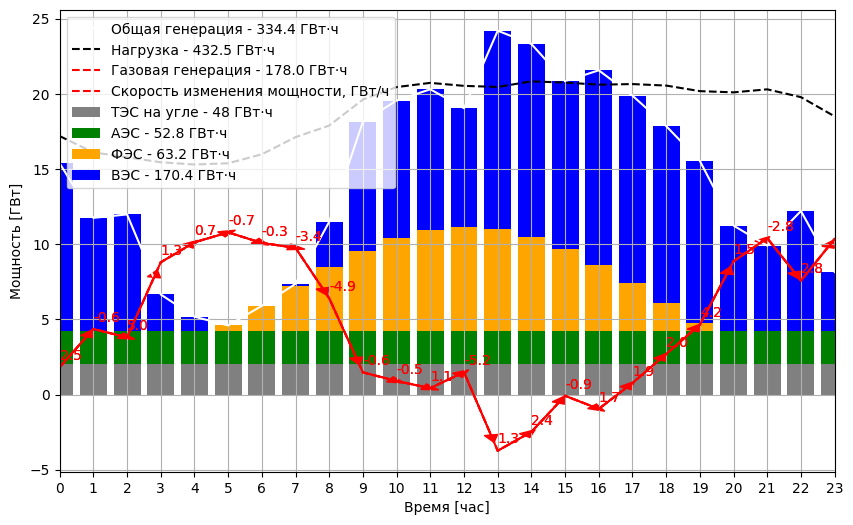

In [27]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt


df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-05-24').date()]

nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *= solar * (1 - accumulation)
hourly_avg_wind_power *= wind * (1 - accumulation)

month = pd.Timestamp('2021-08-08').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = area_load - area_tot
area_nuclear = nuclear * 24
area_coal = coal * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
area_tot = area_solar + area_wind + area_nuclear + area_coal


plt.figure(figsize=(10, 6))

coal_power = np.array([coal] * 24)
plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
         label=f'Общая генерация - {round(area_tot, 1)} ГВт·ч')

# Change from stackplot to bar plot
plt.bar(hourly_avg_wind_power.index, coal_power, color='gray', label=f'ТЭС на угле - 48 ГВт·ч')
bottom = coal_power
plt.bar(hourly_avg_wind_power.index, [nuclear] * 24, bottom=bottom, color='green', label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч')
bottom += np.array([nuclear] * 24)
plt.bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, bottom=bottom, color='orange', label=f'ФЭС - {round(area_solar, 1)} ГВт·ч')
bottom += hourly_avg_solar_power.values
plt.bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=bottom, color='blue', label=f'ВЭС - {round(area_wind, 1)} ГВт·ч')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
         label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')

plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'Газовая генерация - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
    plt.plot([hourly_avg_wind_power.index[i - 1], hourly_avg_wind_power.index[i]], [difference.values[i - 1], difference.values[i]], color='red')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')

    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()


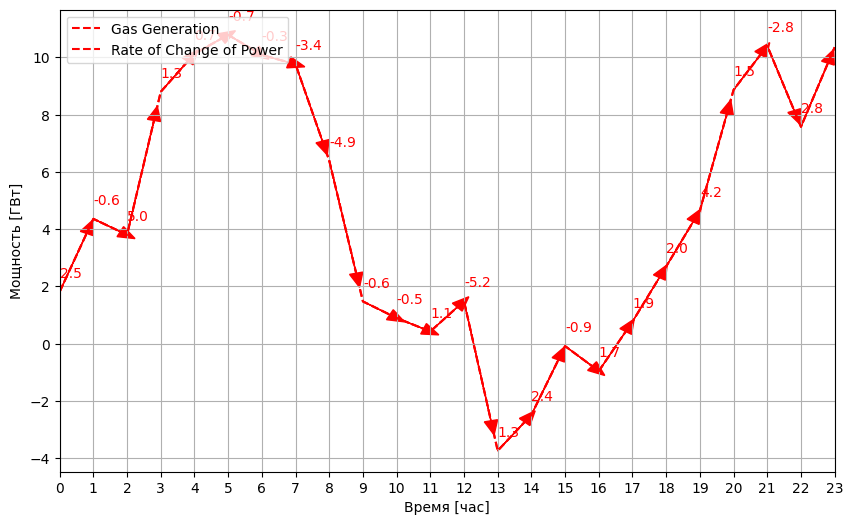

In [29]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Your data processing code goes here

plt.figure(figsize=(10, 6))

# Plot gas generation and rate of change of power
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'Газовая генерация - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

# Add arrows for the speed change
for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')

    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

plt.xlabel('Время [час]')
plt.ylabel('')
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))

# Adjust legend to include only gas generation and rate of change of power
plt.legend(["Gas Generation", "Rate of Change of Power"], loc='upper left')
plt.show()


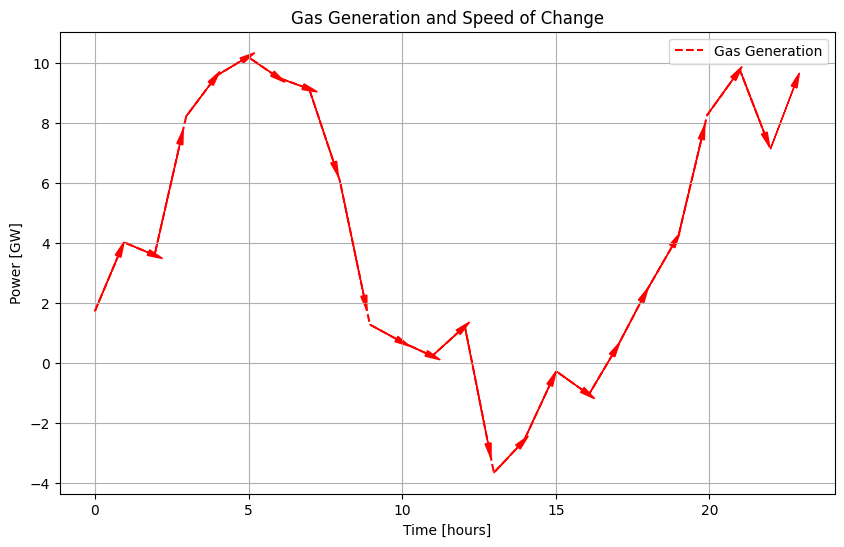

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

plt.figure(figsize=(10, 6))

# Plot gas generation
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation')

# Plot arrows for speed change
for i in range(len(speed_gas)):
    if speed_gas[i] > 0:
        plt.arrow(time_gas[i], gas_generation[i], time_diff[i] * 0.8, speed_change[i] * 0.8,
                  head_width=0.2, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(time_gas[i], gas_generation[i], time_diff[i] * 0.8, speed_change[i] * 0.8,
                  head_width=0.2, head_length=0.5, fc='red', ec='red')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation and Speed of Change')
plt.legend()
plt.grid(True)
plt.show()


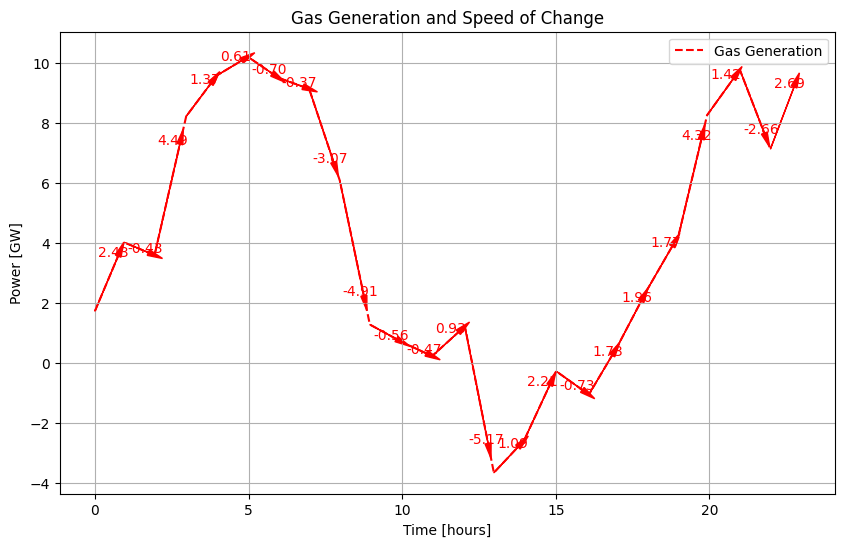

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

plt.figure(figsize=(10, 6))

# Plot gas generation
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation')

# Plot arrows for speed change
for i in range(len(speed_gas)):
    if speed_gas[i] > 0:
        plt.arrow(time_gas[i], gas_generation[i], time_diff[i] * 0.8, speed_change[i] * 0.8,
                  head_width=0.2, head_length=0.5, fc='red', ec='red')
        plt.text(time_gas[i] + 0.1, gas_generation[i] + speed_change[i] * 0.8, f'{speed_gas[i]:.2f}', color='red')
    else:
        plt.arrow(time_gas[i], gas_generation[i], time_diff[i] * 0.8, speed_change[i] * 0.8,
                  head_width=0.2, head_length=0.5, fc='red', ec='red')
        plt.text(time_gas[i] + 0.1, gas_generation[i] + speed_change[i] * 0.8, f'{speed_gas[i]:.2f}', color='red')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation and Speed of Change')
plt.legend()
plt.grid(True)
plt.show()


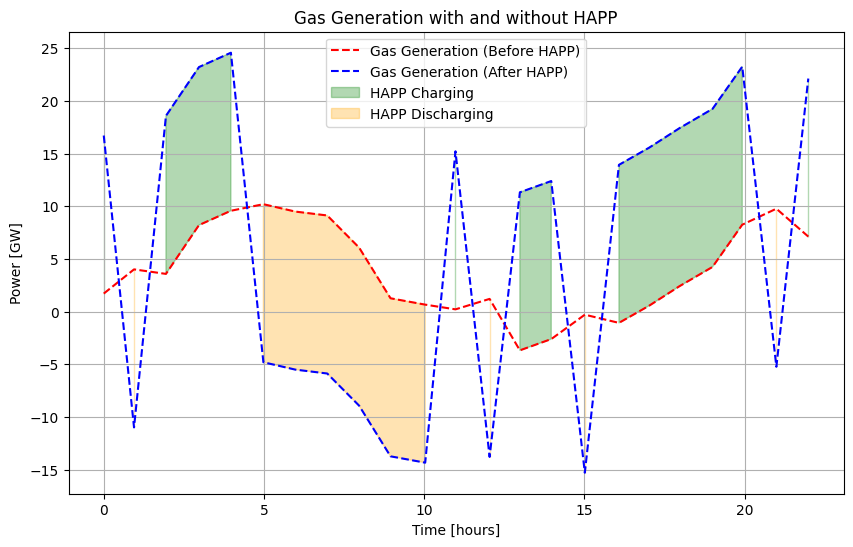

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

# Integrate the hydroaccumulating power plant
happ_charge = [15 if speed > 0 else 0 for speed in speed_gas]  # Charging when gas generation change rate is positive
happ_discharge = [-15 if speed < 0 else 0 for speed in speed_gas]  # Discharging when gas generation change rate is negative

# Adjust gas generation after integrating HAPP
gas_generation_with_happ = np.array(gas_generation[:-1]) + np.array(happ_charge) + np.array(happ_discharge)

plt.figure(figsize=(10, 6))

# Plot gas generation before and after integrating HAPP
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation (Before HAPP)')
plt.plot(time_gas[:-1], gas_generation_with_happ, color='blue', linestyle='--', label='Gas Generation (After HAPP)')

# Plot charging periods of HAPP
plt.fill_between(time_gas[:-1], gas_generation[:-1], gas_generation_with_happ, where=np.array(happ_charge) > 0,
                 color='green', alpha=0.3, label='HAPP Charging')

# Plot discharging periods of HAPP
plt.fill_between(time_gas[:-1], gas_generation[:-1], gas_generation_with_happ, where=np.array(happ_discharge) < 0,
                 color='orange', alpha=0.3, label='HAPP Discharging')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation with and without HAPP')
plt.legend()
plt.grid(True)
plt.show()


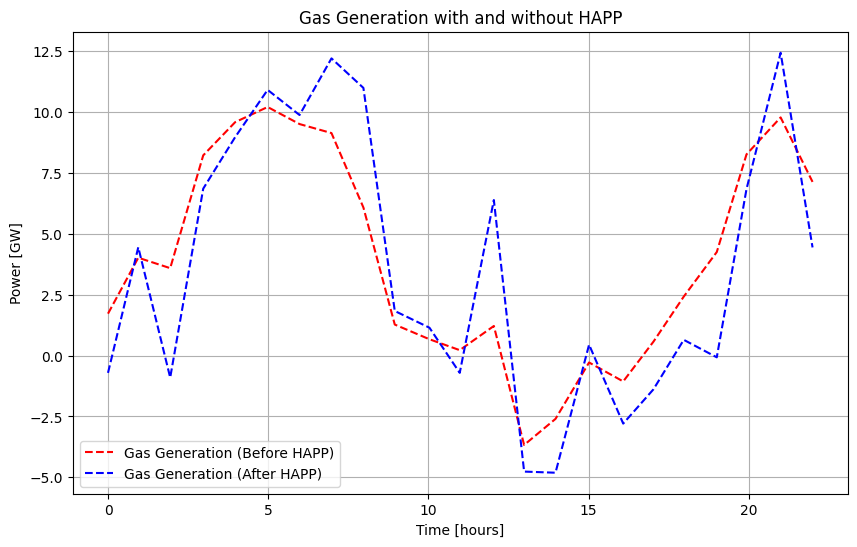

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

# Hydroaccumulating power plant capacity (in GWh)
happ_capacity = 30

# Integrate the hydroaccumulating power plant with adjusted charging and discharging
happ_charge = [min(happ_capacity, max(0, -speed)) for speed in speed_gas]  # Gradual charging based on negative speed
happ_discharge = [min(happ_capacity, max(0, speed)) for speed in speed_gas]  # Gradual discharging based on positive speed

# Adjust gas generation after integrating HAPP
gas_generation_with_happ = np.array(gas_generation[:-1]) + np.array(happ_charge) - np.array(happ_discharge)

plt.figure(figsize=(10, 6))

# Plot gas generation before and after integrating HAPP
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation (Before HAPP)')
plt.plot(time_gas[:-1], gas_generation_with_happ, color='blue', linestyle='--', label='Gas Generation (After HAPP)')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation with and without HAPP')
plt.legend()
plt.grid(True)
plt.show()


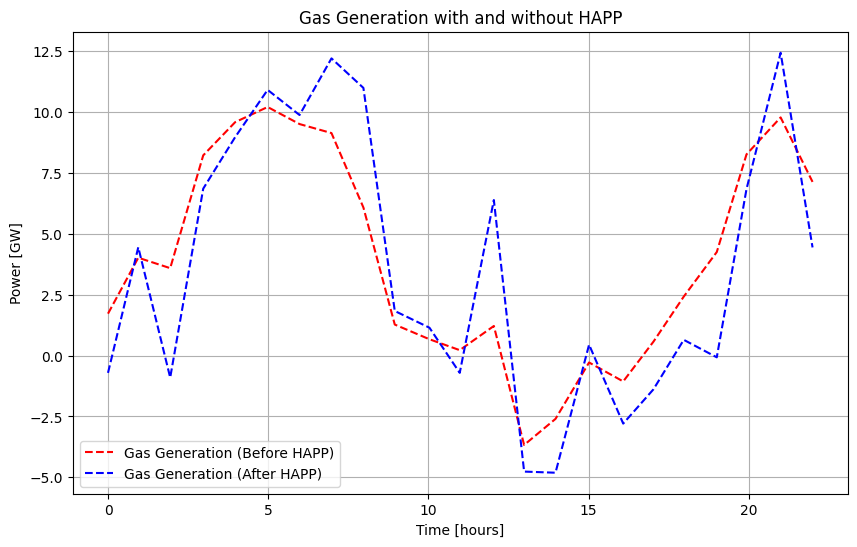

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

# Hydroaccumulating power plant capacity (in GWh)
happ_capacity = 50

# Integrate the hydroaccumulating power plant with adjusted charging and discharging
happ_charge = [min(happ_capacity, max(0, -speed)) for speed in speed_gas]  # Gradual charging based on negative speed
happ_discharge = [min(happ_capacity, max(0, speed)) for speed in speed_gas]  # Gradual discharging based on positive speed

# Adjust gas generation after integrating HAPP
gas_generation_with_happ = np.array(gas_generation[:-1]) + np.array(happ_charge) - np.array(happ_discharge)

plt.figure(figsize=(10, 6))

# Plot gas generation before and after integrating HAPP
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation (Before HAPP)')
plt.plot(time_gas[:-1], gas_generation_with_happ, color='blue', linestyle='--', label='Gas Generation (After HAPP)')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation with and without HAPP')
plt.legend()
plt.grid(True)
plt.show()


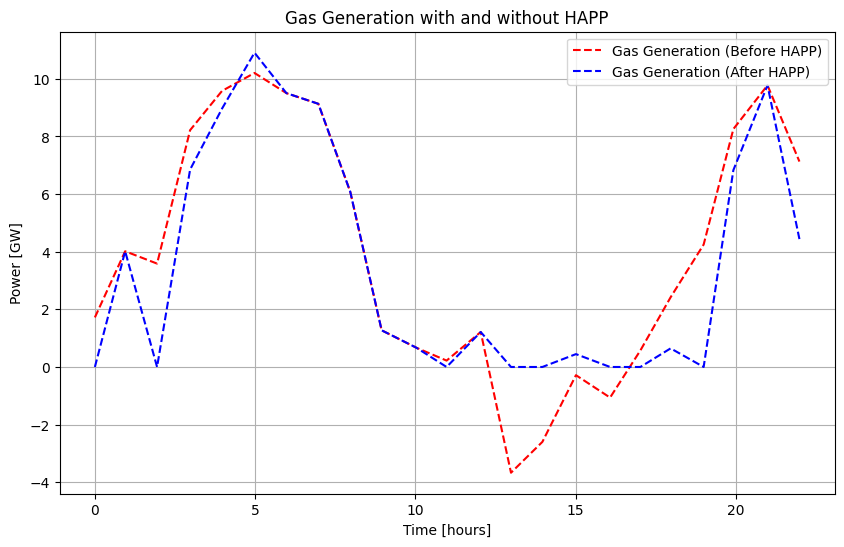

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
time_gas = [0, 0.944734877, 1.941000747, 2.971620612, 3.967886482, 4.98132935, 5.97759522, 6.97386109,
            7.97012696, 8.949215833, 10.03136669, 10.97610157, 12.04107543, 12.98581031, 13.96489918,
            15.01269604, 16.0776699, 17.02240478, 17.96713966, 18.99775952, 19.9253174, 20.99029126,
            21.98655713, 22.94846901]

gas_generation = [1.719844358, 4.015564202, 3.587548638, 8.217898833, 9.579766537, 10.20233463,
                  9.501945525, 9.13229572, 6.077821012, 1.272373541, 0.6692607, 0.221789883,
                  1.214007782, -3.6692607, -2.59922179, -0.284046693, -1.062256809, 0.571984436,
                  2.420233463, 4.249027237, 8.256809339, 9.774319066, 7.128404669, 9.715953307]

# Calculate speed change
speed_change = np.diff(gas_generation)  # Difference between consecutive values
time_diff = np.diff(time_gas)  # Time difference

speed_gas = speed_change / time_diff  # Speed of change

# Hydroaccumulating power plant capacity (in GWh)
happ_capacity = 50

# Integrate the hydroaccumulating power plant with adjusted charging and discharging
happ_charge = [min(happ_capacity, max(0, -speed)) if (gas < 0) or (time == 5) else 0 for gas, speed, time in zip(gas_generation[:-1], speed_gas, range(24))]  # Gradual charging based on negative gas generation or at 5 o'clock
happ_discharge = [min(happ_capacity, max(0, speed)) if (gas >= 0) and (time != 5) else 0 for gas, speed, time in zip(gas_generation[:-1], speed_gas, range(24))]  # Gradual discharging based on positive gas generation except at 5 o'clock

# Adjust gas generation after integrating HAPP
gas_generation_with_happ = np.array(gas_generation[:-1]) - np.array(happ_discharge) + np.array(happ_charge)
gas_generation_with_happ = np.maximum(gas_generation_with_happ, 0)  # Ensure gas generation remains non-negative

plt.figure(figsize=(10, 6))

# Plot gas generation before and after integrating HAPP
plt.plot(time_gas[:-1], gas_generation[:-1], color='red', linestyle='--', label='Gas Generation (Before HAPP)')
plt.plot(time_gas[:-1], gas_generation_with_happ, color='blue', linestyle='--', label='Gas Generation (After HAPP)')

plt.xlabel('Time [hours]')
plt.ylabel('Power [GW]')
plt.title('Gas Generation with and without HAPP')
plt.legend()
plt.grid(True)
plt.show()


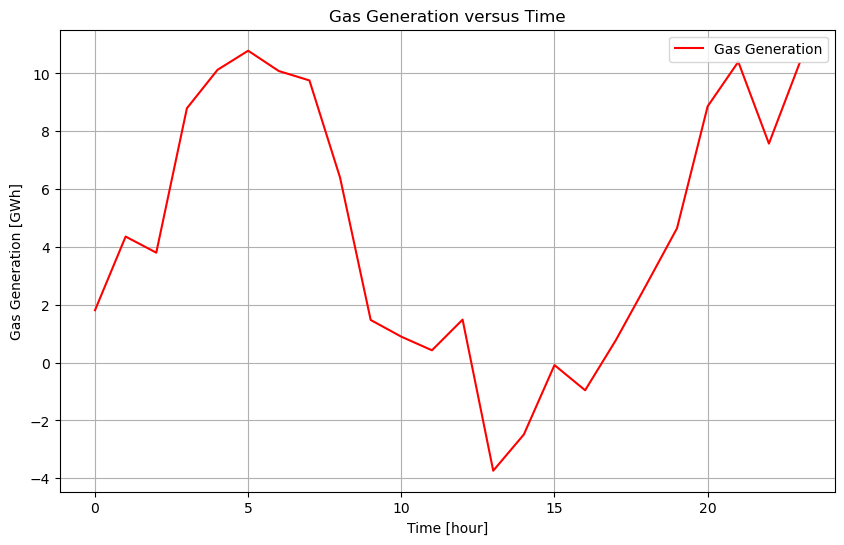

In [155]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Assuming df_day, total_power_output, difference, area_gas are already defined

# Create RR DataFrame
RR = pd.DataFrame({'Time': hourly_avg_wind_power.index, 'Gas_Generation': difference.values})

# Plotting the gas generation versus time
plt.figure(figsize=(10, 6))
plt.plot(RR['Time'], RR['Gas_Generation'], color='red', label='Gas Generation')
plt.xlabel('Time [hour]')
plt.ylabel('Gas Generation [GWh]')
plt.title('Gas Generation versus Time')
plt.grid(True)
plt.legend()
plt.show()


In [156]:
def charge_HPP(available_energy, HPP_capacity):
    """
    Simulate charging operation of the hydro pumping plant (HPP).
    """
    charge_rate = min(available_energy, HPP_capacity)  # Charge at the available rate or HPP capacity, whichever is lower
    return charge_rate

def discharge_HPP(HPP_energy, required_energy):
    """
    Simulate discharging operation of the hydro pumping plant (HPP).
    """
    discharge_rate = min(HPP_energy, required_energy)  # Discharge at the available rate or required energy, whichever is lower
    return discharge_rate


NameError: name 'pl' is not defined

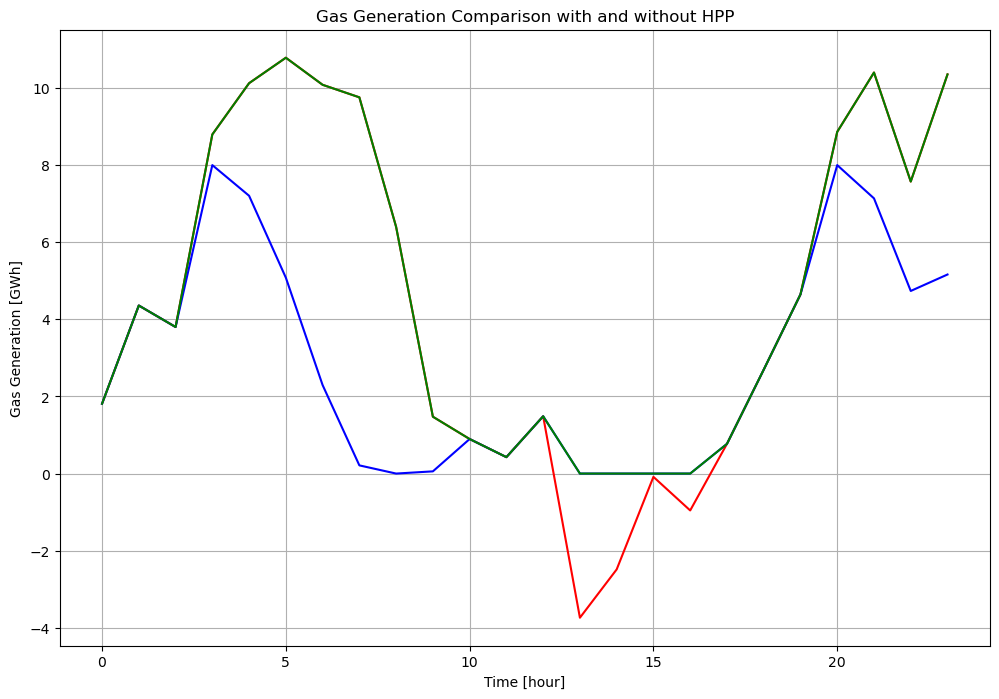

In [159]:
# Define HPP capacities
HPP_capacity_8_GWh = 8  # HPP capacity in GWh
HPP_capacity_16_GWh = 16  # HPP capacity in GWh

# Simulate HPP operation and gas generation with different capacities
def simulate_HPP_operation(RR, HPP_capacity):
    """
    Simulate HPP operation and gas generation with given HPP capacity.
    """
    gas_generation_with_HPP = []  # Gas generation with HPP
    HPP_energy = 0  # Initialize HPP energy
    
    # Simulate HPP operation for each time step
    for index, row in RR.iterrows():
        gas_generation = row['Gas_Generation']
        
        # Charge the HPP if gas generation exceeds HPP capacity
        if gas_generation > HPP_capacity:
            excess_energy = gas_generation - HPP_capacity
            HPP_energy += charge_HPP(excess_energy, HPP_capacity)
        
        # Discharge the HPP if gas generation is less than HPP capacity
        else:
            required_energy = HPP_capacity - gas_generation
            HPP_energy -= discharge_HPP(HPP_energy, required_energy)
        
        # Calculate gas generation after HPP operation
        gas_generation_with_HPP.append(max(gas_generation - HPP_energy, 0))  # Ensure gas generation is non-negative
    
    return gas_generation_with_HPP

# Simulate HPP operation for different capacities
gas_generation_with_HPP_8_GWh = simulate_HPP_operation(RR, HPP_capacity_8_GWh)
gas_generation_with_HPP_16_GWh = simulate_HPP_operation(RR, HPP_capacity_16_GWh)

# Plotting gas generation profiles with and without HPP
plt.figure(figsize=(12, 8))

# Without HPP
plt.plot(RR['Time'], RR['Gas_Generation'], color='red', label='Gas Generation without HPP')

# With HPP (8 GWh)
plt.plot(RR['Time'], gas_generation_with_HPP_8_GWh, color='blue', label='Gas Generation with HPP (8 GWh)')

# With HPP (16 GWh)
plt.plot(RR['Time'], gas_generation_with_HPP_16_GWh, color='green', label='Gas Generation with HPP (16 GWh)')

plt.xlabel('Time [hour]')
plt.ylabel('Gas Generation [GWh]')
plt.title('Gas Generation Comparison with and without HPP')
plt.grid(True)
pl


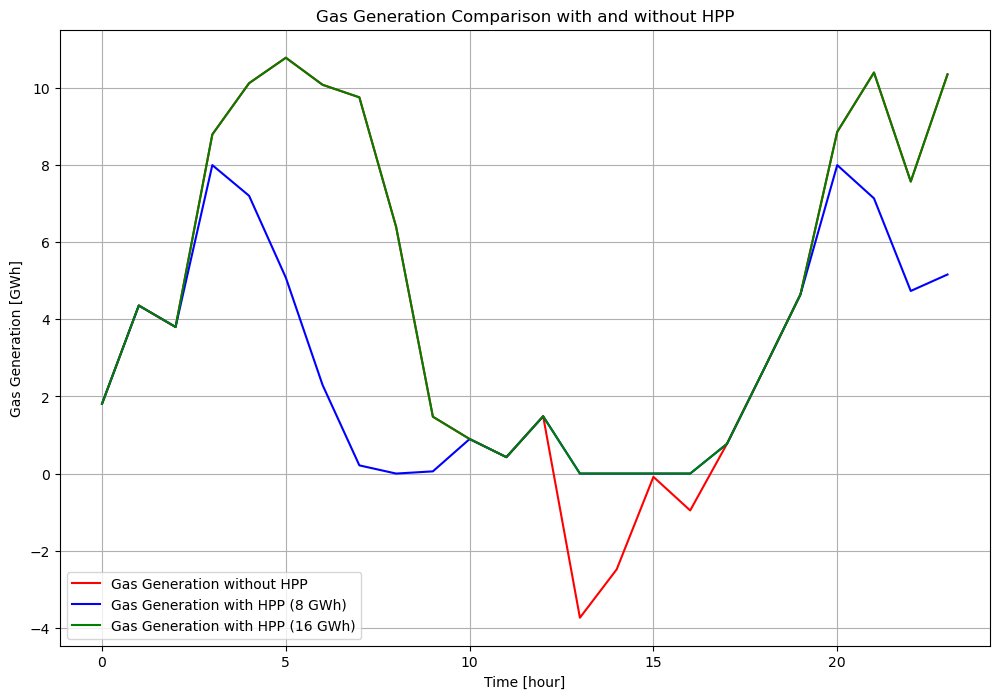

In [160]:
# Define HPP capacities
HPP_capacity_8_GWh = 8  # HPP capacity in GWh
HPP_capacity_16_GWh = 16  # HPP capacity in GWh

# Simulate HPP operation and gas generation with different capacities
def simulate_HPP_operation(RR, HPP_capacity):
    """
    Simulate HPP operation and gas generation with given HPP capacity.
    """
    gas_generation_with_HPP = []  # Gas generation with HPP
    HPP_energy = 0  # Initialize HPP energy
    
    # Simulate HPP operation for each time step
    for index, row in RR.iterrows():
        gas_generation = row['Gas_Generation']
        
        # Charge the HPP if gas generation exceeds HPP capacity
        if gas_generation > HPP_capacity:
            excess_energy = gas_generation - HPP_capacity
            HPP_energy += charge_HPP(excess_energy, HPP_capacity)
        
        # Discharge the HPP if gas generation is less than HPP capacity
        else:
            required_energy = HPP_capacity - gas_generation
            HPP_energy -= discharge_HPP(HPP_energy, required_energy)
        
        # Calculate gas generation after HPP operation
        gas_generation_with_HPP.append(max(gas_generation - HPP_energy, 0))  # Ensure gas generation is non-negative
    
    return gas_generation_with_HPP

# Simulate HPP operation for different capacities
gas_generation_with_HPP_8_GWh = simulate_HPP_operation(RR, HPP_capacity_8_GWh)
gas_generation_with_HPP_16_GWh = simulate_HPP_operation(RR, HPP_capacity_16_GWh)

# Plotting gas generation profiles with and without HPP
plt.figure(figsize=(12, 8))

# Without HPP
plt.plot(RR['Time'], RR['Gas_Generation'], color='red', label='Gas Generation without HPP')

# With HPP (8 GWh)
plt.plot(RR['Time'], gas_generation_with_HPP_8_GWh, color='blue', label='Gas Generation with HPP (8 GWh)')

# With HPP (16 GWh)
plt.plot(RR['Time'], gas_generation_with_HPP_16_GWh, color='green', label='Gas Generation with HPP (16 GWh)')

plt.xlabel('Time [hour]')
plt.ylabel('Gas Generation [GWh]')
plt.title('Gas Generation Comparison with and without HPP')
plt.grid(True)
plt.legend()
plt.show()


In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate gas generation after HPP integration
RR['Gas_Generation_After_HPP'] = RR['Gas_Generation'] - RR['HPP_Discharge']

# Ensure gas generation after HPP integration does not go negative
RR['Gas_Generation_After_HPP'] = np.maximum(RR['Gas_Generation_After_HPP'], 0)

# Plotting the gas generation, HPP charge, HPP discharge, and gas generation after HPP integration versus time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time [hour]')
ax1.set_ylabel('Energy [GWh]', color=color)
ax1.plot(RR['Time'], RR['Gas_Generation'], color=color, label='Gas Generation (Before HPP)')
ax1.plot(RR['Time'], RR['Gas_Generation_After_HPP'], color='orange', label='Gas Generation (After HPP)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Energy [MWh]', color=color)  
ax2.bar(RR['Time'], RR['HPP_Charge'], color='blue', alpha=0.5, width=0.1, label='HPP Charge')
ax2.bar(RR['Time'], -RR['HPP_Discharge'], color='green', alpha=0.5, width=0.1, label='HPP Discharge')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Gas Generation and HPP Operation versus Time')
plt.show()


KeyError: 'HPP_Discharge'

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate gas generation after HPP integration
RR['Gas_Generation_After_HPP'] = RR['Gas_Generation'] - RR['HPP_Discharge']

# Ensure gas generation after HPP integration does not go negative
RR['Gas_Generation_After_HPP'] = np.maximum(RR['Gas_Generation_After_HPP'], 0)

# Plotting the gas generation, HPP charge, HPP discharge, and gas generation after HPP integration versus time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time [hour]')
ax1.set_ylabel('Energy [GWh]', color=color)
ax1.plot(RR['Time'], RR['Gas_Generation'], color=color, label='Gas Generation (Before HPP)')
ax1.plot(RR['Time'], RR['Gas_Generation_After_HPP'], color='orange', label='Gas Generation (After HPP)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Energy [MWh]', color=color)  
ax2.bar(RR['Time'], RR['HPP_Charge'], color='blue', alpha=0.5, width=0.1, label='HPP Charge')
ax2.bar(RR['Time'], -RR['HPP_Discharge'], color='green', alpha=0.5, width=0.1, label='HPP Discharge')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Gas Generation and HPP Operation versus Time')
plt.show()


KeyError: 'HPP_Discharge'

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_18252\3063970114.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Hour'] = df_day['DATE_TIME'].dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_18252\3063970114.py:31: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_solar = simps(np.abs(hourly_avg_solar_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_18252\3063970114.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_wind = simps(np.abs(hourly_avg_wind_power))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_18252\3063970114.py:33: Depreca

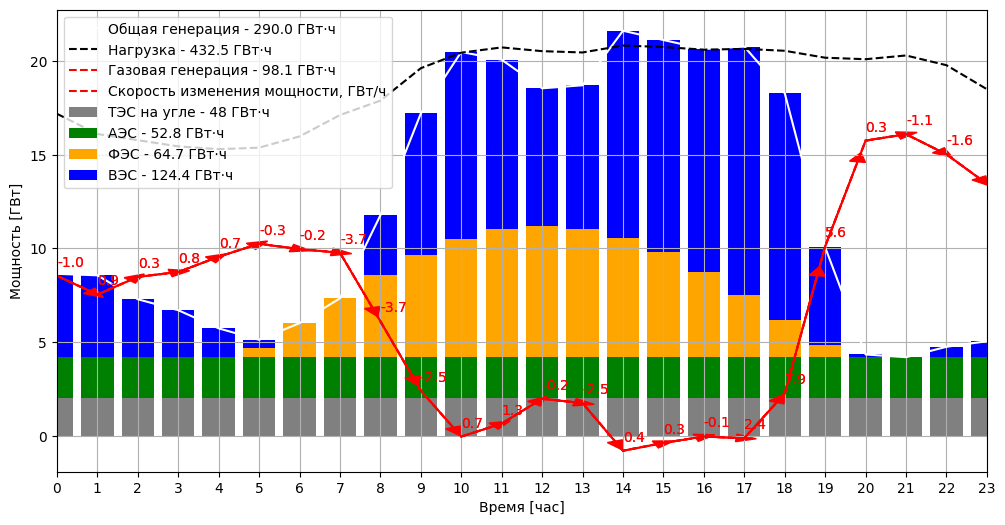

In [29]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt


df_day = df[df['DATE_TIME'].dt.date == pd.Timestamp('2021-07-10').date()]

nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

df_day['Hour'] = df_day['DATE_TIME'].dt.hour
hourly_avg_wind_power = df_day.groupby('Hour')['Wind Turbine Power'].mean()
hourly_avg_solar_power = df_day.groupby('Hour')['Solar Panel Power'].mean()

hourly_avg_solar_power *= solar * (1 - accumulation)
hourly_avg_wind_power *= wind * (1 - accumulation)

month = pd.Timestamp('2021-08-08').month
load_df = summer_load_df if month in range(4, 10) else winter_load_df

total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

area_gas = area_load - area_tot
area_nuclear = nuclear * 24
area_coal = coal * 24
area_solar = simps(np.abs(hourly_avg_solar_power))
area_wind = simps(np.abs(hourly_avg_wind_power))
area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))
area_tot = area_solar + area_wind + area_nuclear + area_coal


plt.figure(figsize=(12, 6))

coal_power = np.array([coal] * 24)
plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
         label=f'Общая генерация - {round(area_tot, 1)} ГВт·ч')

# Change from stackplot to bar plot
plt.bar(hourly_avg_wind_power.index, coal_power, color='gray', label=f'ТЭС на угле - 48 ГВт·ч')
bottom = coal_power
plt.bar(hourly_avg_wind_power.index, [nuclear] * 24, bottom=bottom, color='green', label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч')
bottom += np.array([nuclear] * 24)
plt.bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, bottom=bottom, color='orange', label=f'ФЭС - {round(area_solar, 1)} ГВт·ч')
bottom += hourly_avg_solar_power.values
plt.bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=bottom, color='blue', label=f'ВЭС - {round(area_wind, 1)} ГВт·ч')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
         label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')

plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'Газовая генерация - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
    plt.plot([hourly_avg_wind_power.index[i - 1], hourly_avg_wind_power.index[i]], [difference.values[i - 1], difference.values[i]], color='red')

for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')

    # Adding arrows for the speed change
    if speed > 0:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        plt.arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                  head_width=0.4, head_length=0.5, fc='red', ec='red')

plt.xlabel('Время [час]')
plt.ylabel('Мощность [ГВт]')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left')
plt.show()

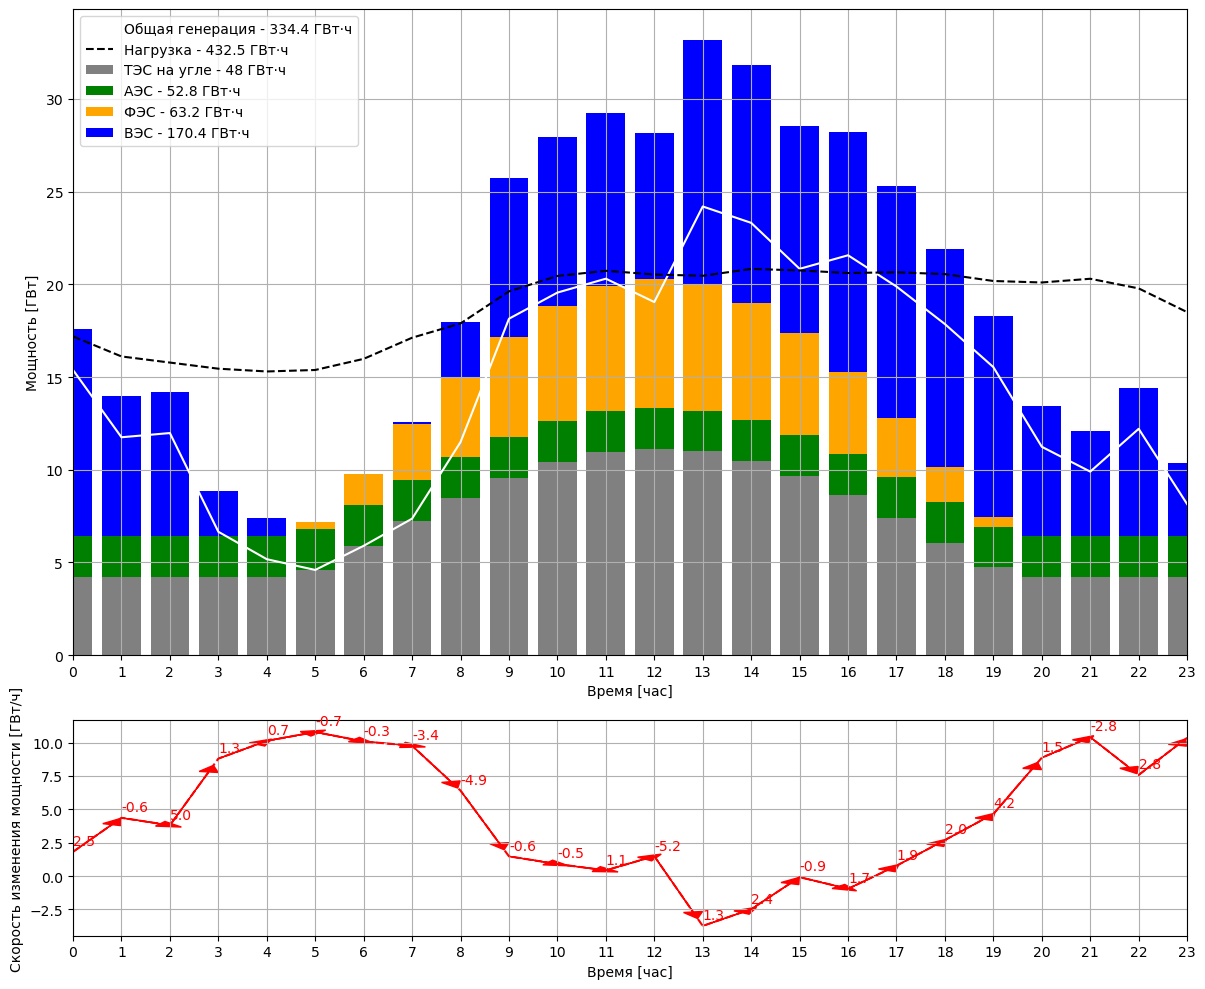

In [101]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Assume df_day, summer_load_df, winter_load_df, and other necessary variables are defined here

# Your existing code for calculations and main plot

fig, axs = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# Main plot
axs[0].plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Общая генерация - {round(area_tot, 1)} ГВт·ч')
axs[0].bar(hourly_avg_wind_power.index, coal_power, color='gray', label=f'ТЭС на угле - 48 ГВт·ч')
bottom = coal_power
axs[0].bar(hourly_avg_wind_power.index, [nuclear] * 24, bottom=bottom, color='green', label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч')
bottom += np.array([nuclear] * 24)
axs[0].bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, bottom=bottom, color='orange', label=f'ФЭС - {round(area_solar, 1)} ГВт·ч')
bottom += hourly_avg_solar_power.values
axs[0].bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=bottom, color='blue', label=f'ВЭС - {round(area_wind, 1)} ГВт·ч')
axs[0].plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
             label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')
axs[0].set_xlabel('Время [час]')
axs[0].set_ylabel('Мощность [ГВт]')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(0, 23)
axs[0].set_xticks(range(0, 24, 1))
axs[0].legend(loc='upper left')




plt.bar(hourly_avg_wind_power.index, coal_power, color='gray', label=f'ТЭС на угле - 48 ГВт·ч')
bottom = coal_power

plt.bar(hourly_avg_wind_power.index, [nuclear] * 24, bottom=bottom, color='green', label=f'АЭС - {round(area_nuclear, 1)} ГВт·ч')
bottom += np.array([nuclear] * 24)
plt.bar(hourly_avg_wind_power.index, hourly_avg_solar_power.values, bottom=bottom, color='orange', label=f'ФЭС - {round(area_solar, 1)} ГВт·ч')
bottom += hourly_avg_solar_power.values
plt.bar(hourly_avg_wind_power.index, hourly_avg_wind_power.values, bottom=bottom, color='blue', label=f'ВЭС - {round(area_wind, 1)} ГВт·ч')

plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black', linestyle='--',
         label=f'Нагрузка - {round(area_load, 1)} ГВт·ч')

plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label=f'Газовая генерация - {round(area_gas, 1)} ГВт·ч')
plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
         label='Скорость изменения мощности, ГВт/ч')

# Red line with arrows and numbers
axs[1].plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--')
for i in range(1, len(difference)):
    x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
    y_diff = difference.values[i] - difference.values[i - 1]
    speed = y_diff / x_diff
    offset = 0.5  # Adjust this value as needed
    axs[1].text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
    if speed > 0:
        axs[1].arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')
    else:
        axs[1].arrow(hourly_avg_wind_power.index[i - 1], difference.values[i - 1], x_diff * 0.8, y_diff * 0.8,
                      head_width=0.4, head_length=0.5, fc='red', ec='red')
axs[1].set_xlabel('Время [час]')
axs[1].set_ylabel('Скорость изменения мощности [ГВт/ч]')
axs[1].grid(True)
axs[1].set_xlim(0, 23)
axs[1].set_xticks(range(0, 24, 1))

plt.tight_layout()
plt.show()


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\1059267560.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Hour'] = df_month['DATE_TIME'].dt.hour


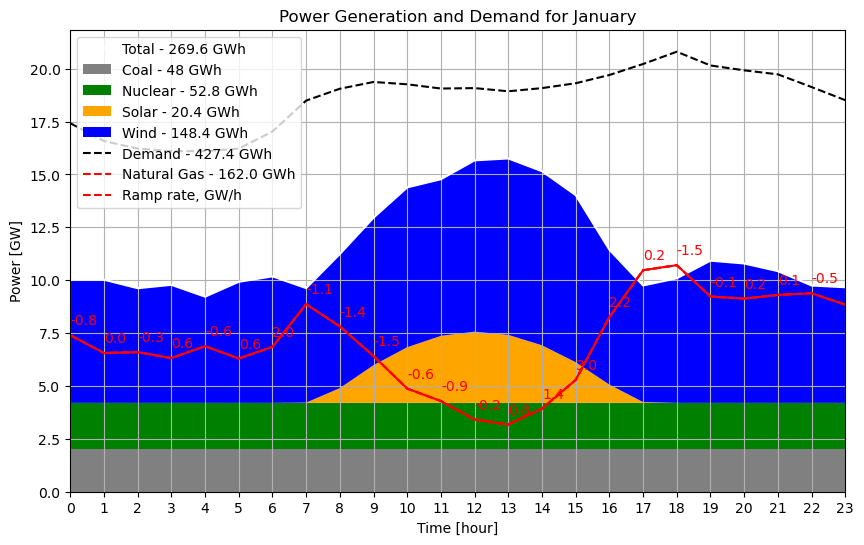

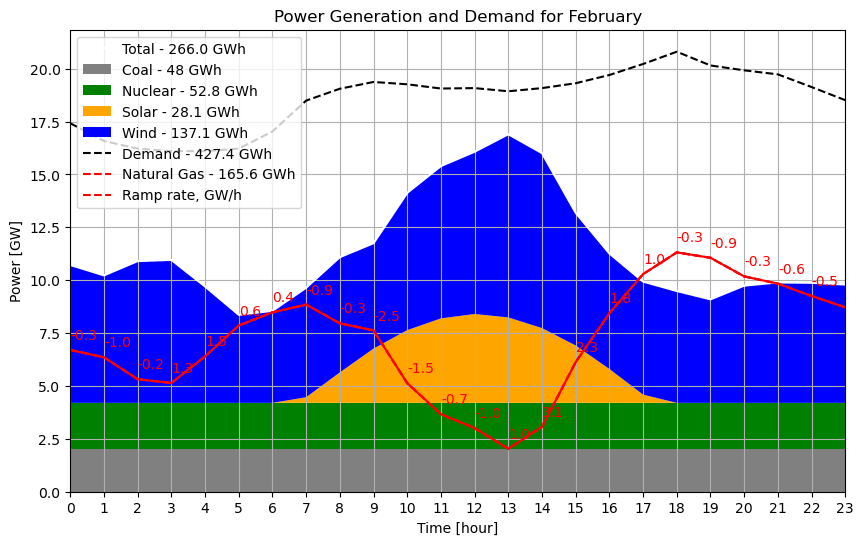

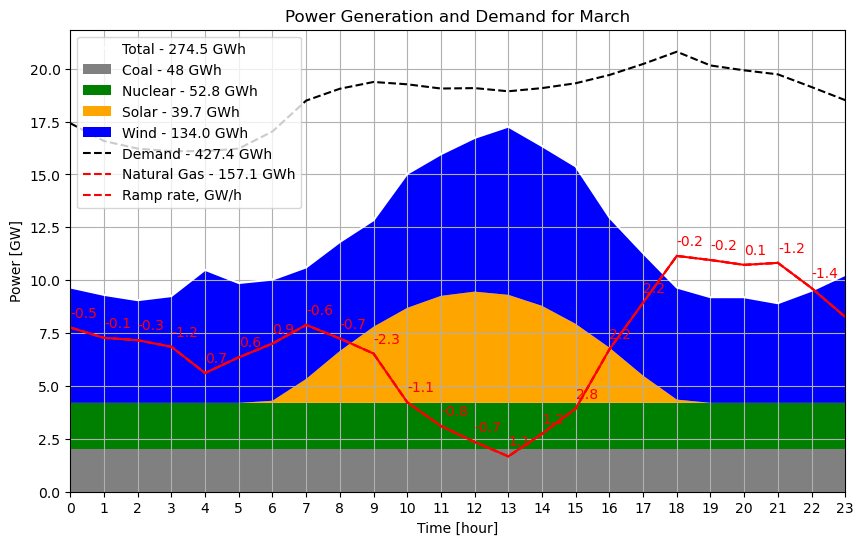

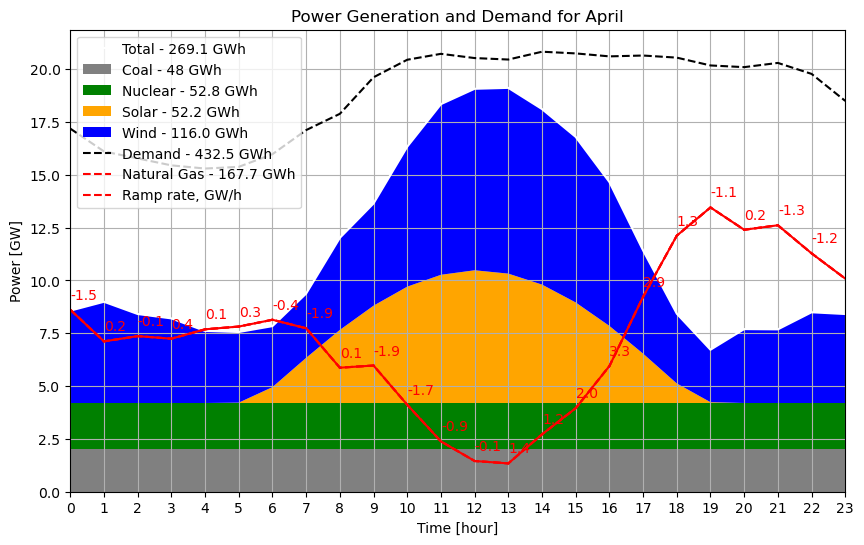

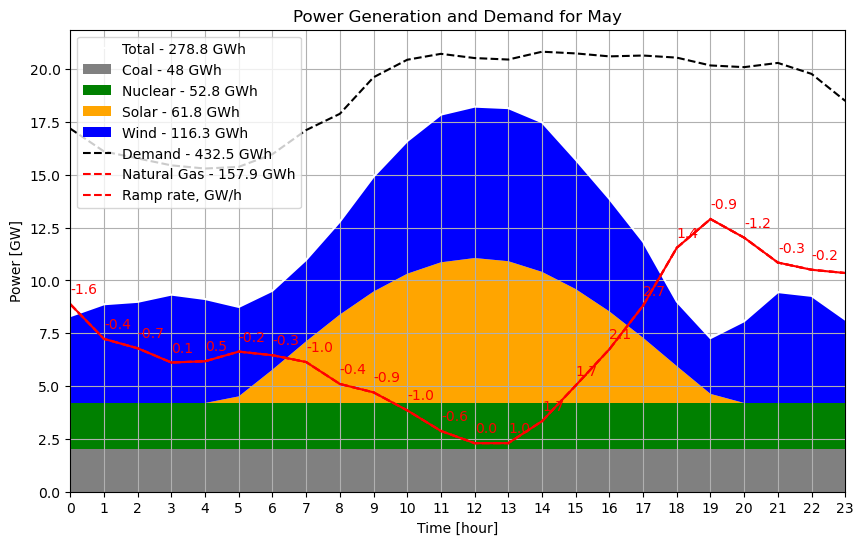

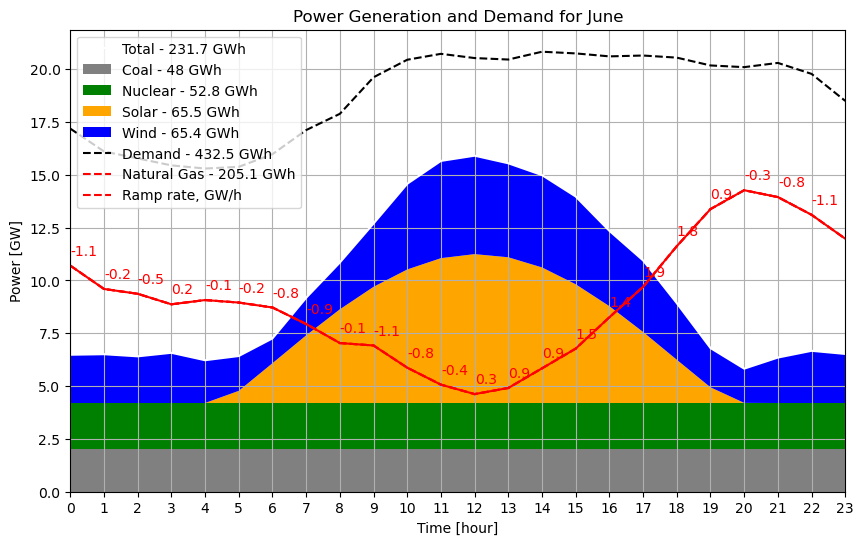

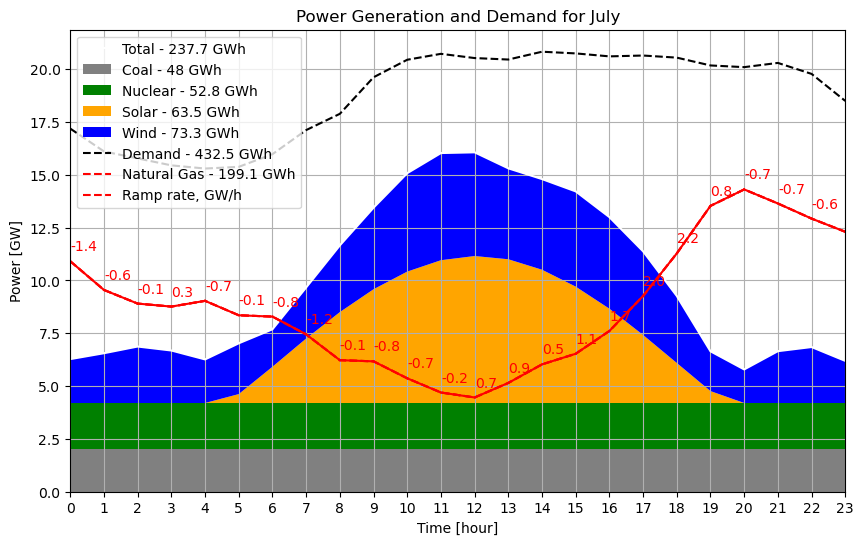

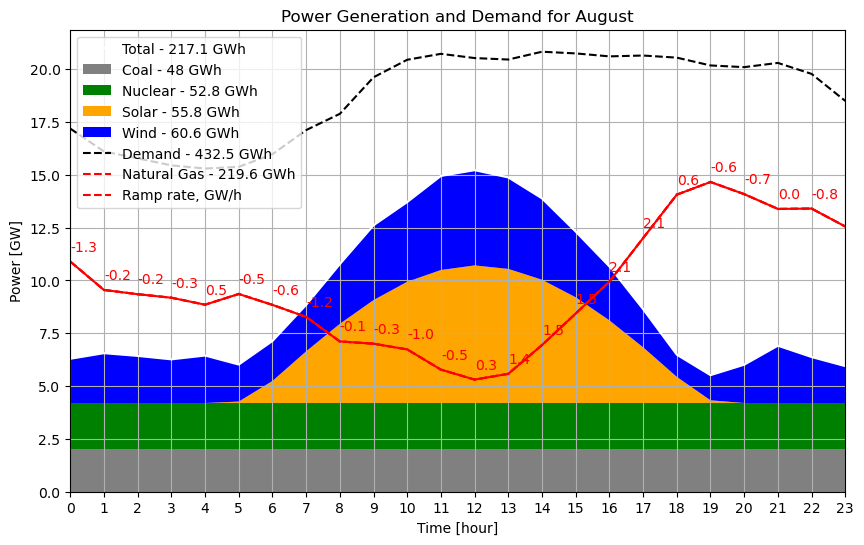

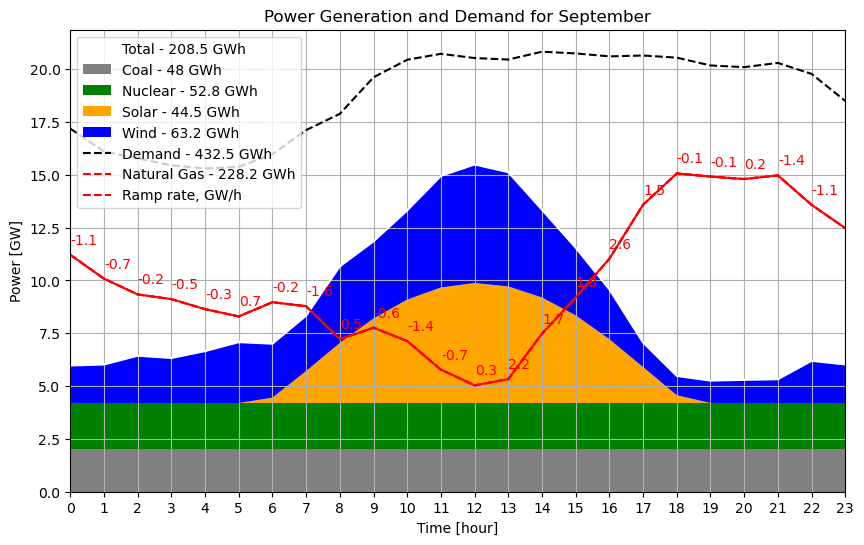

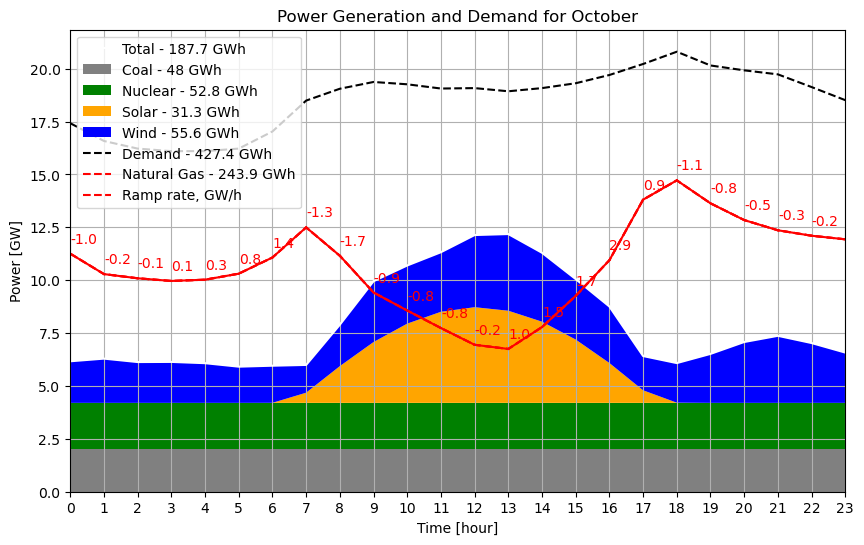

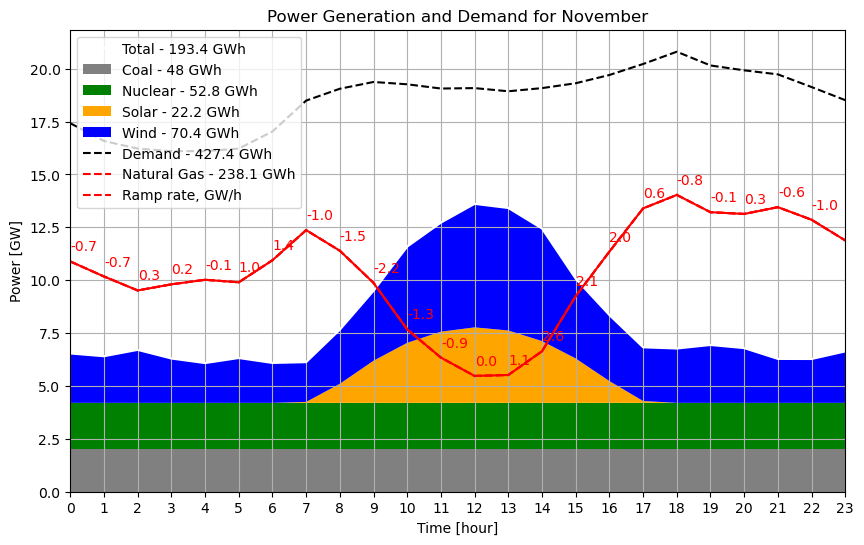

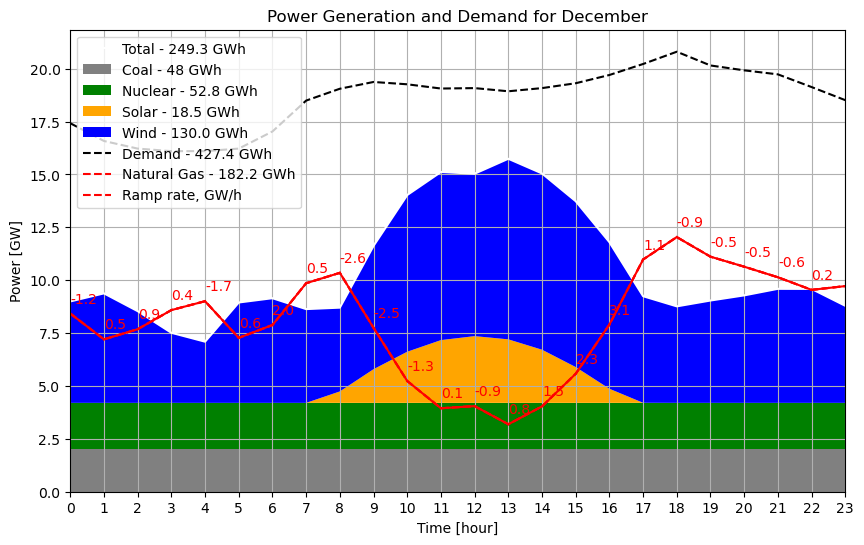

In [29]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Define constants
nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each month
for month in range(1, 13):

    # Filter data for the current month
    df_month = df[df['DATE_TIME'].dt.month == month]

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_nuclear = nuclear * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    plt.figure(figsize=(10, 6))

    coal_power = np.array([coal] * 24)
    plt.plot(hourly_avg_wind_power.index, total_power_output, color='white',
             label=f'Total - {round(area_tot, 1)} GWh')

    plt.stackplot(hourly_avg_wind_power.index, coal_power, [nuclear] * 24, hourly_avg_solar_power.values,
                  hourly_avg_wind_power.values,
                  labels=[f'Coal - 48 GWh',
                          f'Nuclear - {round(area_nuclear, 1)} GWh',
                          f'Solar - {round(area_solar, 1)} GWh',
                          f'Wind - {round(area_wind, 1)} GWh'],
                  colors=['gray', 'green', 'orange', 'blue'])

    plt.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='black',
             linestyle='--',
             label=f'Demand - {round(area_load, 1)} GWh')

    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label=f'Natural Gas - {round(area_gas, 1)} GWh')
    plt.plot(hourly_avg_wind_power.index, difference, color='red', linestyle='--',
             label='Ramp rate, GW/h')

    for i in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[i] - hourly_avg_wind_power.index[i - 1]
        y_diff = difference.values[i] - difference.values[i - 1]
        speed = y_diff / x_diff
        offset = 0.5  # Adjust this value as needed
        plt.text(hourly_avg_wind_power.index[i - 1], difference.values[i - 1] + offset, f'{round(speed, 1)}', color='red')
        plt.plot([hourly_avg_wind_power.index[i - 1], hourly_avg_wind_power.index[i]],
                 [difference.values[i - 1], difference.values[i]], color='red')

    plt.xlabel('Time [hour]')
    plt.ylabel('Power [GW]')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 23)
    plt.xticks(range(0, 24, 1))
    plt.legend(loc='upper left')
    plt.title(f'Power Generation and Demand for {month_names[month-1]}')
    plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\1783169408.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Hour'] = df_month['DATE_TIME'].dt.hour


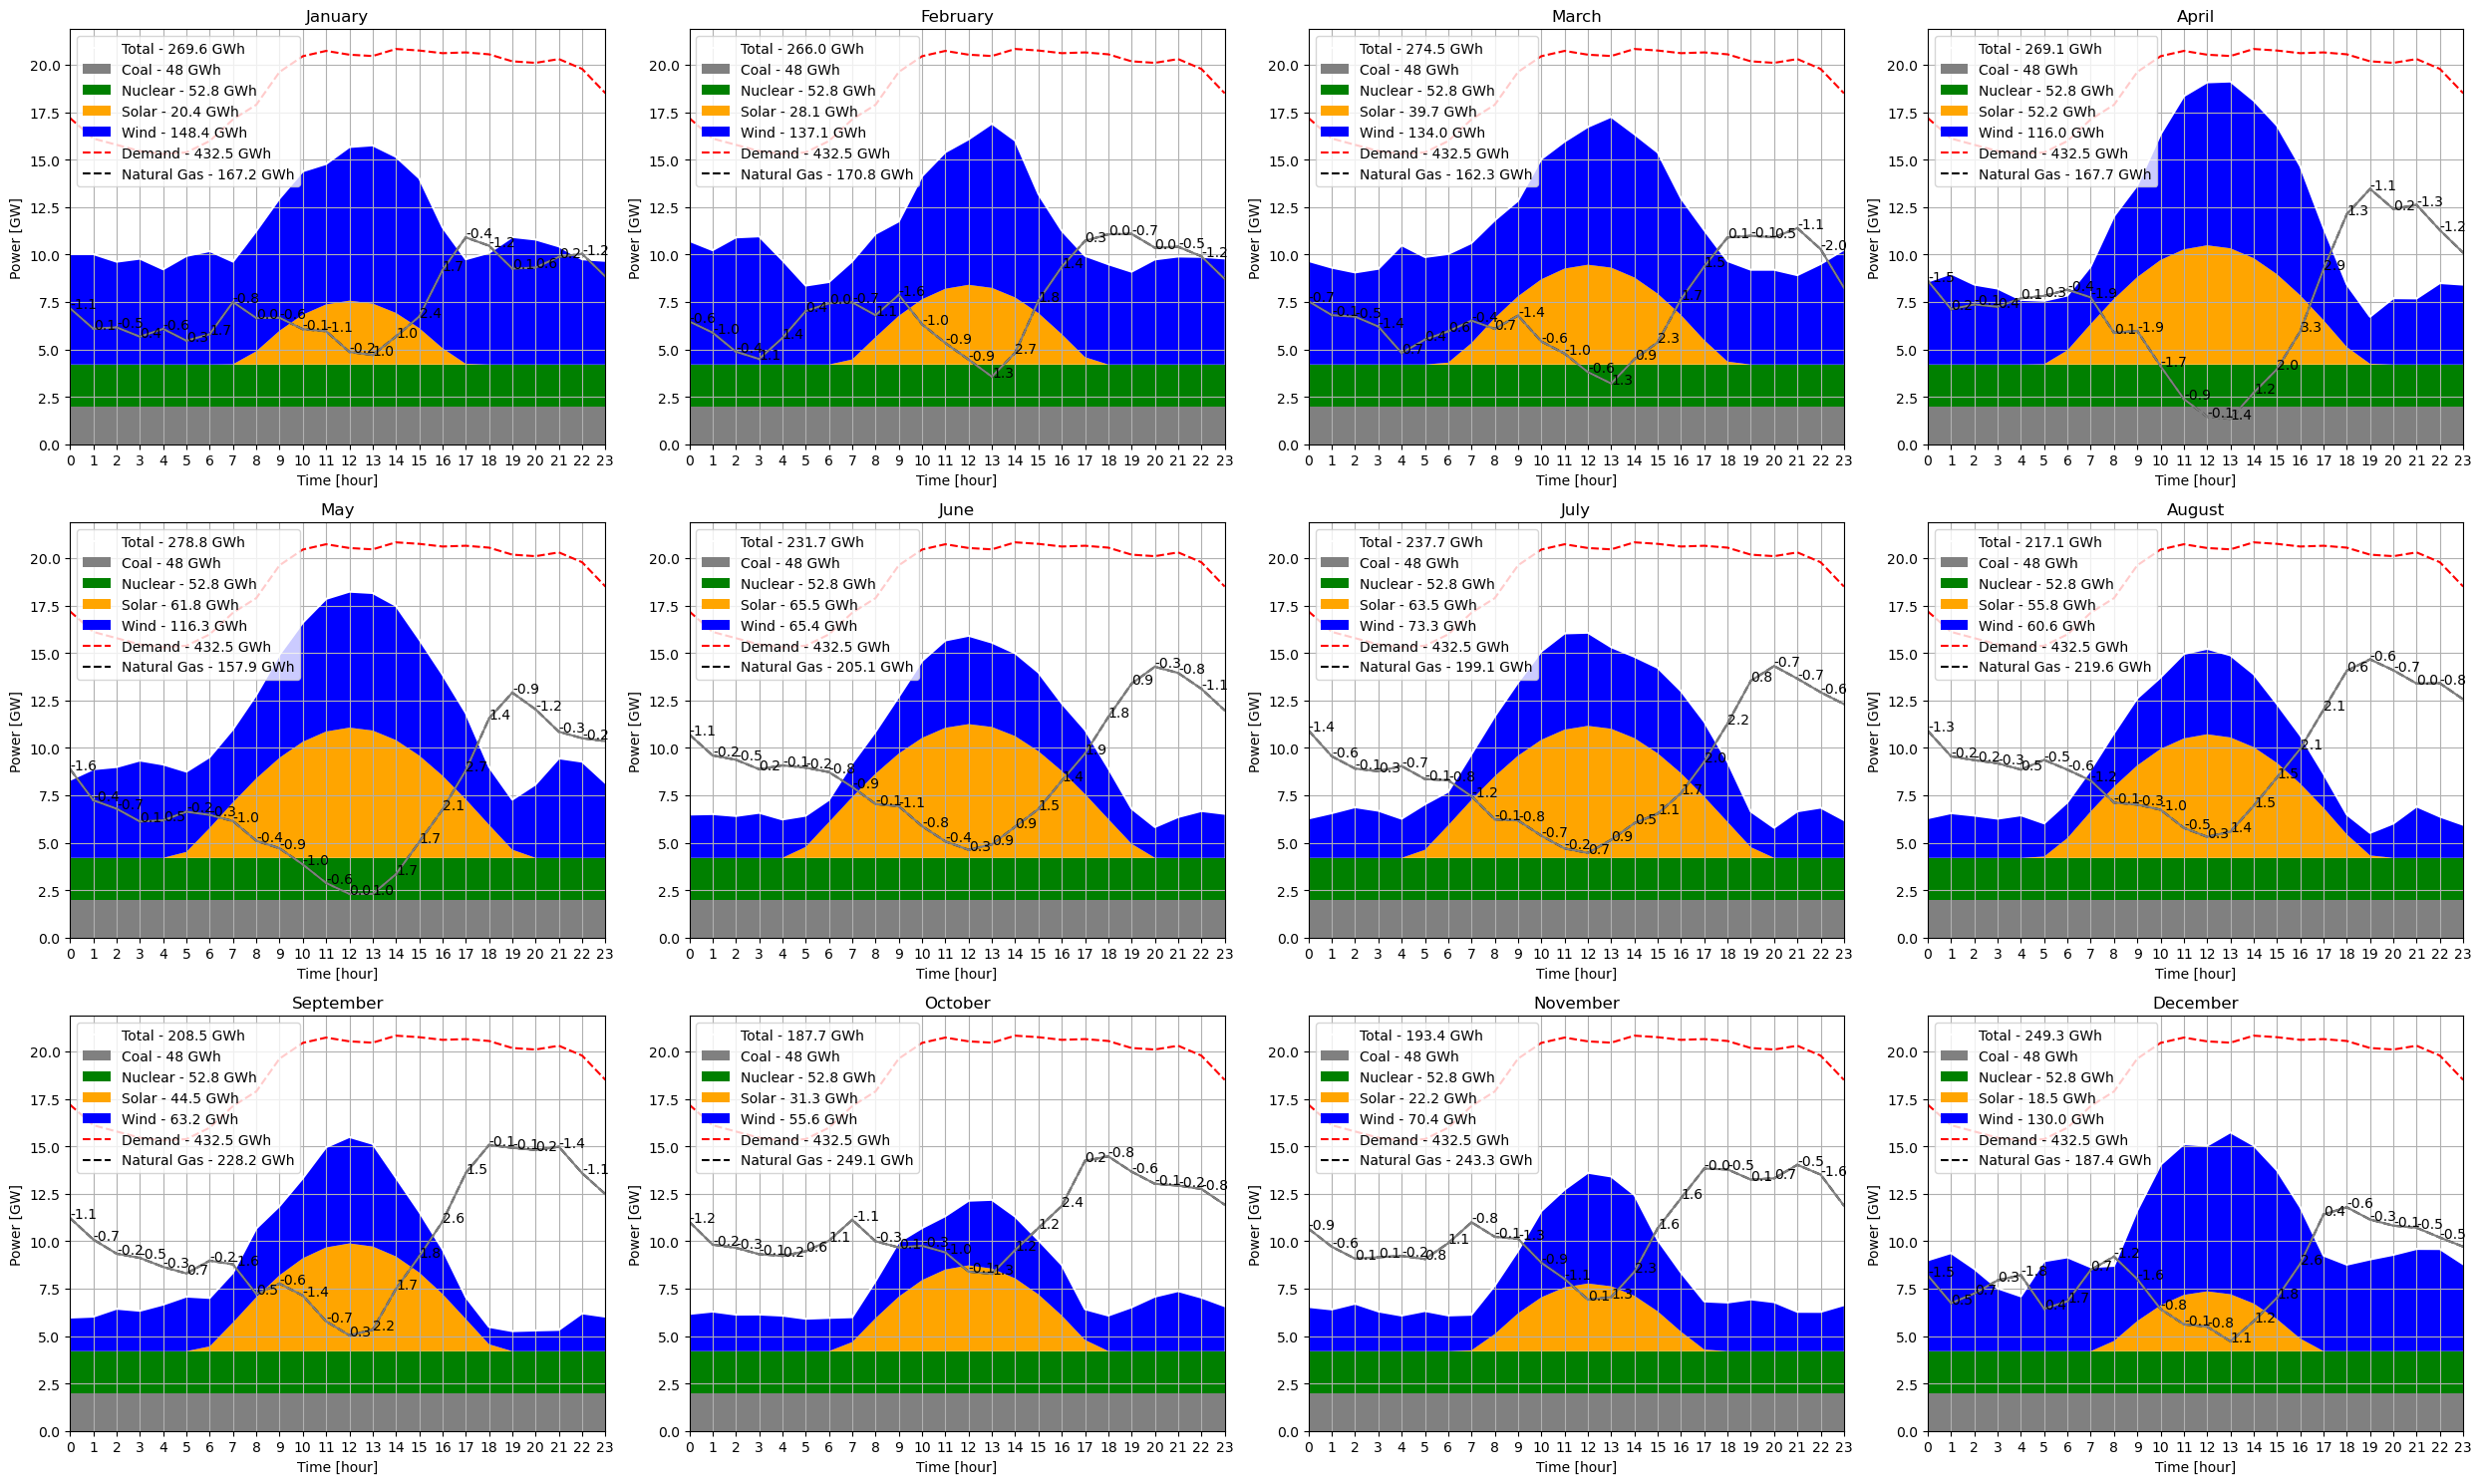

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import simps

# Create a figure with 3 rows and 4 columns for each month
fig, axs = plt.subplots(3, 4, figsize=(25, 15))

nuclear = 2.2
coal = 2.0
solar = 8.8
wind = 15.8
accumulation = 0.15

# Monthly data processing and plotting
for i, month_name in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 
                                 'July', 'August', 'September', 'October', 'November', 'December']):
    df_month = df[df['DATE_TIME'].dt.month == i + 1]

    df_month['Hour'] = df_month['DATE_TIME'].dt.hour
    hourly_avg_wind_power = df_month.groupby('Hour')['Wind Turbine Power'].mean()
    hourly_avg_solar_power = df_month.groupby('Hour')['Solar Panel Power'].mean()

    hourly_avg_solar_power *= solar * (1 - accumulation)
    hourly_avg_wind_power *= wind * (1 - accumulation)

    month = pd.Timestamp('2021-08-08').month
    load_df = summer_load_df if month in range(4, 10) else winter_load_df

    total_power_output = hourly_avg_solar_power + hourly_avg_wind_power + np.array([nuclear] * 24) + np.array([coal] * 24)
    difference = load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'] - total_power_output

    area_gas = simps(np.abs(difference))
    area_nuclear = 2.2 * 24
    area_solar = simps(np.abs(hourly_avg_solar_power))
    area_wind = simps(np.abs(hourly_avg_wind_power))
    area_tot = area_solar + area_wind + area_nuclear + 48
    area_load = simps(np.abs(load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load']))

    coal_power = np.array([2.0] * 24)

    ax = axs[i // 4, i % 4]

    ax.plot(hourly_avg_wind_power.index, total_power_output, color='white', label=f'Total - {round(area_tot, 1)} GWh')
    ax.stackplot(hourly_avg_wind_power.index, coal_power, [2.2] * 24, hourly_avg_solar_power.values, hourly_avg_wind_power.values,
                 labels=[f'Coal - 48 GWh',
                         f'Nuclear - {round(area_nuclear, 1)} GWh',
                         f'Solar - {round(area_solar, 1)} GWh',
                         f'Wind - {round(area_wind, 1)} GWh'],
                 colors=['gray', 'green', 'orange', 'blue'])
    ax.plot(load_df['Hour'], load_df['Winter Load' if month < 4 or month > 9 else 'Summer Load'], color='red', linestyle='--',
            label=f'Demand - {round(area_load, 1)} GWh')
    ax.plot(hourly_avg_wind_power.index, difference, color='black', linestyle='--', label=f'Natural Gas - {round(area_gas, 1)} GWh')

    ax.set_title(f'Month: {month_name}')
    ax.set_xlabel('Time [hour]')
    ax.set_ylabel('Power [GW]')
    ax.grid(True)
    ax.set_xlim(0, 23)
    ax.set_xticks(range(0, 24, 1))
    ax.legend(loc='upper left')
    
    # Marking the points on the Natural Gas graph
    for j in range(1, len(difference)):
        x_diff = hourly_avg_wind_power.index[j] - hourly_avg_wind_power.index[j-1]
        y_diff = difference.values[j] - difference.values[j-1]
        speed = y_diff / x_diff
        ax.text(hourly_avg_wind_power.index[j-1], difference.values[j-1], f'{round(speed, 1)}')
        ax.plot([hourly_avg_wind_power.index[j-1], hourly_avg_wind_power.index[j]], [difference.values[j-1], difference.values[j]], color='gray')

  
        
    # Additional formatting for each subplot
    ax.set_title(month_name)
    ax.set_xlabel('Time [hour]')
    ax.set_ylabel('Power [GW]')
    ax.grid(True)
    ax.set_xlim(0, 23)
    ax.set_xticks(range(0, 24, 1))
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# SOLAR GENERATION VERIFICATION

In [31]:
gen_1=pd.read_csv('Plant_1_Generation_Data.csv')
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Create separate columns for Hour, Month, and Day
gen_1['Hour'] = gen_1['DATE_TIME'].dt.hour
gen_1['Month'] = gen_1['DATE_TIME'].dt.month
gen_1['Day'] = gen_1['DATE_TIME'].dt.day
gen_1["Normalized_DC"]=gen_1['DC_POWER']/gen_1['DC_POWER'].max()
gen_1["Normalized_AC"]=gen_1['AC_POWER']/gen_1['AC_POWER'].max()
gen_1=gen_1[['DATE_TIME','Hour','Month','Day','Normalized_DC', 'Normalized_AC']]
gen_1

DATE_TIME  Hour  Month  Day  Normalized_DC  Normalized_AC
0     2020-05-15 00:00:00     0      5   15            0.0            0.0
1     2020-05-15 00:00:00     0      5   15            0.0            0.0
2     2020-05-15 00:00:00     0      5   15            0.0            0.0
3     2020-05-15 00:00:00     0      5   15            0.0            0.0
4     2020-05-15 00:00:00     0      5   15            0.0            0.0
...                   ...   ...    ...  ...            ...            ...
68773 2020-06-17 23:45:00    23      6   17            0.0            0.0
68774 2020-06-17 23:45:00    23      6   17            0.0            0.0
68775 2020-06-17 23:45:00    23      6   17            0.0            0.0
68776 2020-06-17 23:45:00    23      6   17            0.0            0.0
68777 2020-06-17 23:45:00    23      6   17            0.0            0.0

[68778 rows x 6 columns]

In [32]:
latitude = 14.81
longitude = 78.28

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

gen_1['Zenith_Angle'] = gen_1['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
gen_1['Solar Panel Power'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)    
gen_1['Solar Panel Power_07'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)*0.9
gen_1  

DATE_TIME  Hour  Month  Day  Normalized_DC  Normalized_AC  \
0     2020-05-15 00:00:00     0      5   15            0.0            0.0   
1     2020-05-15 00:00:00     0      5   15            0.0            0.0   
2     2020-05-15 00:00:00     0      5   15            0.0            0.0   
3     2020-05-15 00:00:00     0      5   15            0.0            0.0   
4     2020-05-15 00:00:00     0      5   15            0.0            0.0   
...                   ...   ...    ...  ...            ...            ...   
68773 2020-06-17 23:45:00    23      6   17            0.0            0.0   
68774 2020-06-17 23:45:00    23      6   17            0.0            0.0   
68775 2020-06-17 23:45:00    23      6   17            0.0            0.0   
68776 2020-06-17 23:45:00    23      6   17            0.0            0.0   
68777 2020-06-17 23:45:00    23      6   17            0.0            0.0   

       Zenith_Angle  Solar Panel Power  Solar Panel Power_07  
0        145.734948                0.0                   0.0  
1        145.734948                0.0                   0.0  
2        145.734948                0.0                   0.0  
3        145.734948                0.0                   0.0  
4        145.734948                0.0                   0.0  
...             ...                ...                   ...  
68773    140.725160                0.0                   0.0  
68774    140.725160                0.0                   0.0  
68775    140.725160                0.0                   0.0  
68776    140.725160                0.0                   0.0  
68777    140.725160                0.0                   0.0  

[68778 rows x 9 columns]

In [33]:
# Create a new DataFrame with maximum Normalized_DC values and average Solar Panel Power values for each hour
max_normalized_dc = gen_1.groupby('Hour')['Normalized_DC'].max().reset_index()
avg_solar_power = gen_1.groupby('Hour')['Solar Panel Power'].mean().reset_index()

hourly_data = pd.merge(max_normalized_dc, avg_solar_power, on='Hour', suffixes=('_max', '_avg'))


index_hour_14 = hourly_data[hourly_data['Hour'] == 14].index.values[0]

# Calculate the mean of previous and next number
mean_value = (hourly_data.loc[index_hour_14 - 1, 'Normalized_DC'] + hourly_data.loc[index_hour_14 + 1, 'Normalized_DC']) / 2

# Update the value at hour 14 with the calculated mean
hourly_data.at[index_hour_14, 'Normalized_DC'] = mean_value

hourly_data

Hour  Normalized_DC  Solar Panel Power
0      0       0.000000           0.000000
1      1       0.000000           0.000000
2      2       0.000000           0.000000
3      3       0.000000           0.000000
4      4       0.000000           0.000000
5      5       0.000000           0.000000
6      6       0.121682           0.099431
7      7       0.375161           0.329612
8      8       0.668849           0.544510
9      9       0.831198           0.729488
10    10       0.933257           0.871218
11    11       0.988194           0.959861
12    12       0.982982           0.989848
13    13       0.996013           0.958962
14    14       0.930514           0.868452
15    15       0.865016           0.726019
16    16       0.570535           0.540476
17    17       0.415231           0.323394
18    18       0.092855           0.095940
19    19       0.000000           0.000000
20    20       0.000000           0.000000
21    21       0.000000           0.000000
22    22       0.000000           0.000000
23    23       0.000000           0.000000

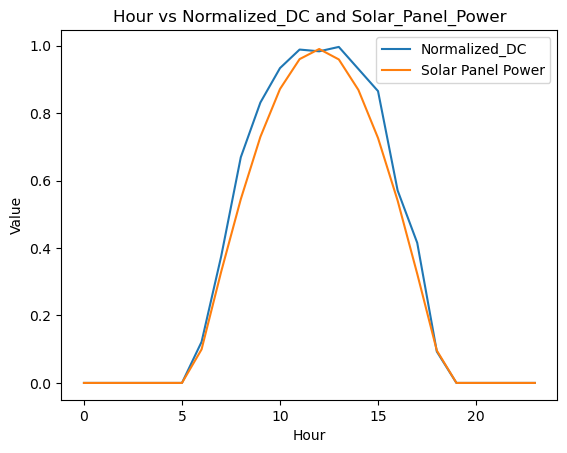

In [34]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot Hour vs Normalized_DC
ax.plot(hourly_data["Hour"], hourly_data["Normalized_DC"], label="Normalized_DC")

# Plot Hour vs Solar_Panel_Power
ax.plot(hourly_data["Hour"], hourly_data["Solar Panel Power"], label="Solar Panel Power")

# Set labels and title
ax.set_xlabel("Hour")
ax.set_ylabel("Value")
ax.set_title("Hour vs Normalized_DC and Solar_Panel_Power")

# Add legend
ax.legend()

# Show the plot
plt.show()

In [35]:

# Calculate RMSE between the two columns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(hourly_data['Normalized_DC'], hourly_data['Solar Panel Power'])
print("Mean Absolute Error: ", mae)
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(hourly_data['Normalized_DC'], hourly_data['Solar Panel Power']))
print("Root Mean Squared Error: ", rmse)
percentage_error = abs((hourly_data['Normalized_DC'] - hourly_data['Solar Panel Power']) / hourly_data['Normalized_DC']) * 100
mean_percentage_error = percentage_error.mean()
print("Mean percentage error: ", mean_percentage_error)

Mean Absolute Error:  0.031424200802138445
Root Mean Squared Error:  0.052822745488797805
Mean percentage error:  9.894940184409567


In [36]:
gen_2 = pd.ExcelFile('ikkteli.xlsx')
sheets = {sheet_name: gen_2.parse(sheet_name, header=None) for sheet_name in gen_2.sheet_names}
gen_2 = pd.concat(sheets.values(), ignore_index=True)
gen_2 = gen_2.iloc[1:]
gen_2.columns = ['DATE_TIME', 'Normalized_DC']



gen_2['Normalized_DC'] = pd.to_numeric(gen_2['Normalized_DC'], errors='coerce')
gen_2['Normalized_DC'] = (gen_2['Normalized_DC'])/(gen_2['Normalized_DC'].max())




gen_2[['year_month_hday','Hour_minute']] = gen_2['DATE_TIME'].astype(str).str.split(' ', expand=True).astype(str)
gen_2[['Hour','Minute','Second']] = gen_2['Hour_minute'].astype(str).str.split(':', expand=True).astype(str)
gen_2[['Year','Month','Day']] = gen_2['year_month_hday'].astype(str).str.split('-', expand=True).astype(str)
gen_2


gen_2

DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1      2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2      2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3      2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4      2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5      2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                    ...            ...             ...         ...  ...   
20225  2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226  2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227  2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228  2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229  2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  
1         55     00  2018    05  01  
2         00     00  2018    05  01  
3         15     00  2018    05  01  
4         30     00  2018    05  01  
5         45     00  2018    05  01  
...      ...    ...   ...   ...  ..  
20225     45     00  2019    05  31  
20226     00     00  2019    05  31  
20227     15     00  2019    05  31  
20228     30     00  2019    05  31  
20229     45     00  2019    05  31  

[20229 rows x 10 columns]

In [37]:
gen_2 = gen_2[gen_2['DATE_TIME'] != 'Tarih']
gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
gen_2

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\4056390633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'], errors='coerce', format='%Y-%m-%d %H:%M:%S')


DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1     2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2     2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3     2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4     2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5     2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                   ...            ...             ...         ...  ...   
20225 2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226 2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227 2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228 2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229 2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  
1         55     00  2018    05  01  
2         00     00  2018    05  01  
3         15     00  2018    05  01  
4         30     00  2018    05  01  
5         45     00  2018    05  01  
...      ...    ...   ...   ...  ..  
20225     45     00  2019    05  31  
20226     00     00  2019    05  31  
20227     15     00  2019    05  31  
20228     30     00  2019    05  31  
20229     45     00  2019    05  31  

[20220 rows x 10 columns]

In [38]:
latitude = 28
longitude = 41
gen_2.dropna(subset=['DATE_TIME'], inplace=True)
def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'])

gen_2['Zenith_Angle'] = gen_2['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
gen_2['Solar Panel Power'] = gen_2['Zenith_Angle'].apply(calculate_relative_power)    
gen_2['Solar Panel Power_07'] = gen_2['Zenith_Angle'].apply(calculate_relative_power)*0.9
gen_2  

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\2451233848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2.dropna(subset=['DATE_TIME'], inplace=True)
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\2451233848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\2451233848.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1     2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2     2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3     2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4     2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5     2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                   ...            ...             ...         ...  ...   
20225 2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226 2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227 2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228 2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229 2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  Zenith_Angle  Solar Panel Power  \
1         55     00  2018    05  01    103.736832                0.0   
2         00     00  2018    05  01    102.737416                0.0   
3         15     00  2018    05  01     99.706619                0.0   
4         30     00  2018    05  01     96.631562                0.0   
5         45     00  2018    05  01     93.517532                0.0   
...      ...    ...   ...   ...  ..           ...                ...   
20225     45     00  2019    05  31    115.506837                0.0   
20226     00     00  2019    05  31    117.736004                0.0   
20227     15     00  2019    05  31    119.830457                0.0   
20228     30     00  2019    05  31    121.775487                0.0   
20229     45     00  2019    05  31    123.555492                0.0   

       Solar Panel Power_07  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
5                       0.0  
...                     ...  
20225                   0.0  
20226                   0.0  
20227                   0.0  
20228                   0.0  
20229                   0.0  

[20219 rows x 13 columns]

In [39]:
# Set a threshold to filter out large values
threshold = gen_2['Normalized_DC'].quantile(0.95)  # 95th percentile

# Filter out values above the threshold
filtered_gen_2 = gen_2[gen_2['Normalized_DC'] <= threshold]

# Calculate maximum Normalized_DC values and average Solar Panel Power values for each hour
max_normalized_dc_filtered = filtered_gen_2.groupby('Hour')['Normalized_DC'].max().reset_index()
avg_solar_power_filtered = filtered_gen_2.groupby('Hour')['Solar Panel Power'].mean().reset_index()

# Merge the resulting DataFrames
hourly_data_filtered = pd.merge(max_normalized_dc_filtered, avg_solar_power_filtered, on='Hour', suffixes=('_max', '_avg'))

hourly_data_filtered

Hour  Normalized_DC  Solar Panel Power
0    04       0.003333           0.000000
1    05       0.000000           0.000305
2    06       0.056667           0.050474
3    07       0.180000           0.204842
4    08       0.433300           0.406727
5    09       0.566667           0.588332
6    10       0.666667           0.732140
7    11       0.693333           0.822252
8    12       0.693333           0.844994
9    13       0.693333           0.817413
10   14       0.693333           0.748761
11   15       0.693333           0.639696
12   16       0.690000           0.483099
13   17       0.680000           0.284298
14   18       0.553333           0.101691
15   19       0.513333           0.007283
16   20       0.033333           0.000000
17   21       0.003333           0.000000
18   22       0.003333           0.000000

In [40]:
# Create a new DataFrame with maximum Normalized_DC values and average Solar Panel Power values for each hour
max_normalized_dc = gen_2.groupby('Hour')['Normalized_DC'].max().reset_index()
avg_solar_power = gen_2.groupby('Hour')['Solar Panel Power'].mean().reset_index()

hourly_data2 = pd.merge(max_normalized_dc, avg_solar_power, on='Hour', suffixes=('_max', '_avg'))


hourly_data2

Hour  Normalized_DC  Solar Panel Power
0    04       0.003333           0.000000
1    05       0.000000           0.000305
2    06       0.056667           0.050474
3    07       0.180000           0.204842
4    08       0.433300           0.406727
5    09       0.866667           0.588497
6    10       0.810000           0.732484
7    11       0.946667           0.827703
8    12       0.913333           0.867249
9    13       0.900000           0.849649
10   14       0.933333           0.776280
11   15       0.900000           0.651754
12   16       0.740000           0.483532
13   17       1.000000           0.284507
14   18       0.553333           0.101691
15   19       0.513333           0.007283
16   20       0.033333           0.000000
17   21       0.003333           0.000000
18   22       0.003333           0.000000

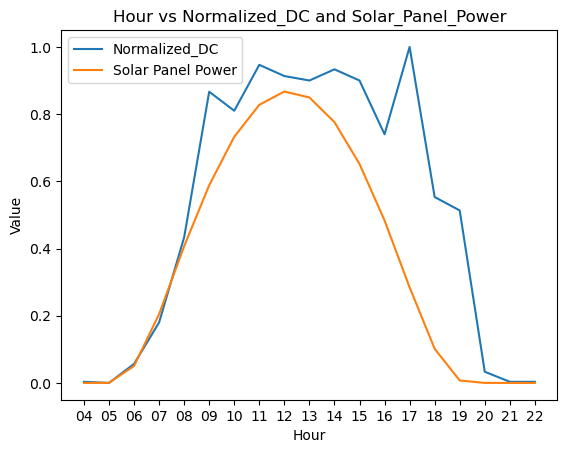

In [41]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot Hour vs Normalized_DC
ax.plot(hourly_data2["Hour"], hourly_data2["Normalized_DC"], label="Normalized_DC")

# Plot Hour vs Solar_Panel_Power
ax.plot(hourly_data2["Hour"], hourly_data2["Solar Panel Power"], label="Solar Panel Power")

# Set labels and title
ax.set_xlabel("Hour")
ax.set_ylabel("Value")
ax.set_title("Hour vs Normalized_DC and Solar_Panel_Power")

# Add legend
ax.legend()

# Show the plot
plt.show()

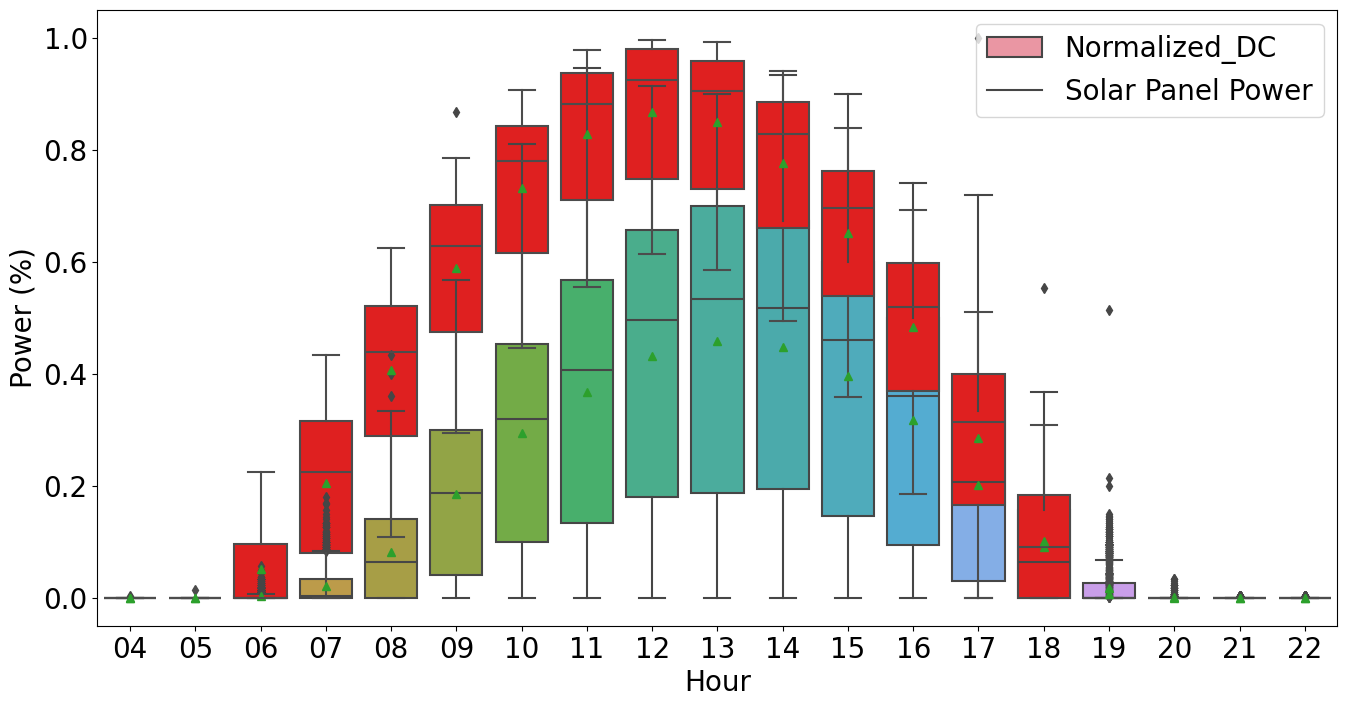

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_2['Normalized_DC'], x=gen_2['Hour'], showmeans=True)
sns.boxplot(y=gen_2['Solar Panel Power'], x=gen_2['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

# WIND GENERATION VERIFICATION

In [43]:
df_wind = pd.read_csv('T1.csv')
df_wind = df_wind.rename(columns={'Wind Direction (°)': 'Wind Direction', 'Wind Speed (m/s)': 'Wind Speed'})
df_wind['Wind Speed'] = df_wind['Wind Speed'].round()
df_wind[['Day','Month', 'Year', 'Hour']] = df_wind['Date/Time'].astype(str).str.split(' ', expand=True).astype(str)
df_wind[['Hour','Minute']] = df_wind['Hour'].astype(str).str.split(':', expand=True).astype(str)
df_wind["Normalized"]=df_wind['Theoretical_Power_Curve (KWh)']/df_wind['Theoretical_Power_Curve (KWh)'].max()
df_wind


Date/Time  LV ActivePower (kW)  Wind Speed  \
0      01 01 2018 00:00           380.047791         5.0   
1      01 01 2018 00:10           453.769196         6.0   
2      01 01 2018 00:20           306.376587         5.0   
3      01 01 2018 00:30           419.645905         6.0   
4      01 01 2018 00:40           380.650696         6.0   
...                 ...                  ...         ...   
50525  31 12 2018 23:10          2963.980957        11.0   
50526  31 12 2018 23:20          1684.353027         7.0   
50527  31 12 2018 23:30          2201.106934         8.0   
50528  31 12 2018 23:40          2515.694092         9.0   
50529  31 12 2018 23:50          2820.466064        10.0   

       Theoretical_Power_Curve (KWh)  Wind Direction Day Month  Year Hour  \
0                         416.328908      259.994904  01    01  2018   00   
1                         519.917511      268.641113  01    01  2018   00   
2                         390.900016      272.564789  01    01  2018   00   
3                         516.127569      271.258087  01    01  2018   00   
4                         491.702972      265.674286  01    01  2018   00   
...                              ...             ...  ..   ...   ...  ...   
50525                    3397.190793       80.502724  31    12  2018   23   
50526                    1173.055771       84.062599  31    12  2018   23   
50527                    1788.284755       84.742500  31    12  2018   23   
50528                    2418.382503       84.297913  31    12  2018   23   
50529                    2779.184096       82.274620  31    12  2018   23   

      Minute  Normalized  
0         00    0.115647  
1         10    0.144422  
2         20    0.108583  
3         30    0.143369  
4         40    0.136584  
...      ...         ...  
50525     10    0.943664  
50526     20    0.325849  
50527     30    0.496746  
50528     40    0.671773  
50529     50    0.771996  

[50530 rows x 11 columns]

In [44]:
import pandas as pd

# Assuming the dataframe is named 'df'
# Assuming the wind speed column is named 'Wind Speed' and the wind direction column is named 'Wind Direction'

# Define a function to calculate wind turbine power
def calculate_power(wind_speed):
    if wind_speed < 4 or wind_speed > 25:
        return 0
    elif wind_speed >= 4 and wind_speed < 12:
        return (wind_speed - 3.5) / (12 - 3.5) * 1
    else:
        return 1

# Apply the function to the 'Wind Speed' column to calculate the power
df_wind['Wind Turbine Power'] = df_wind['Wind Speed'].apply(calculate_power)

# Print the updated dataframe with the added 'Turbine Power' column
df_wind

Date/Time  LV ActivePower (kW)  Wind Speed  \
0      01 01 2018 00:00           380.047791         5.0   
1      01 01 2018 00:10           453.769196         6.0   
2      01 01 2018 00:20           306.376587         5.0   
3      01 01 2018 00:30           419.645905         6.0   
4      01 01 2018 00:40           380.650696         6.0   
...                 ...                  ...         ...   
50525  31 12 2018 23:10          2963.980957        11.0   
50526  31 12 2018 23:20          1684.353027         7.0   
50527  31 12 2018 23:30          2201.106934         8.0   
50528  31 12 2018 23:40          2515.694092         9.0   
50529  31 12 2018 23:50          2820.466064        10.0   

       Theoretical_Power_Curve (KWh)  Wind Direction Day Month  Year Hour  \
0                         416.328908      259.994904  01    01  2018   00   
1                         519.917511      268.641113  01    01  2018   00   
2                         390.900016      272.564789  01    01  2018   00   
3                         516.127569      271.258087  01    01  2018   00   
4                         491.702972      265.674286  01    01  2018   00   
...                              ...             ...  ..   ...   ...  ...   
50525                    3397.190793       80.502724  31    12  2018   23   
50526                    1173.055771       84.062599  31    12  2018   23   
50527                    1788.284755       84.742500  31    12  2018   23   
50528                    2418.382503       84.297913  31    12  2018   23   
50529                    2779.184096       82.274620  31    12  2018   23   

      Minute  Normalized  Wind Turbine Power  
0         00    0.115647            0.176471  
1         10    0.144422            0.294118  
2         20    0.108583            0.176471  
3         30    0.143369            0.294118  
4         40    0.136584            0.294118  
...      ...         ...                 ...  
50525     10    0.943664            0.882353  
50526     20    0.325849            0.411765  
50527     30    0.496746            0.529412  
50528     40    0.671773            0.647059  
50529     50    0.771996            0.764706  

[50530 rows x 12 columns]

In [45]:

# Calculate RMSE between the two columns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_wind['Normalized'], df_wind['Wind Turbine Power'])
print("Mean Absolute Error: ", mae)
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(df_wind['Normalized'], df_wind['Wind Turbine Power']))
print("Root Mean Squared Error: ", rmse)
percentage_error = abs((df_wind['Normalized'] - df_wind['Wind Turbine Power']) / df_wind['Normalized']) * 100
mean_percentage_error = percentage_error.mean()
print("Mean percentage error: ", mean_percentage_error)

Mean Absolute Error:  0.05095895970433301
Root Mean Squared Error:  0.07387371008573963
Mean percentage error:  39.68843807596866


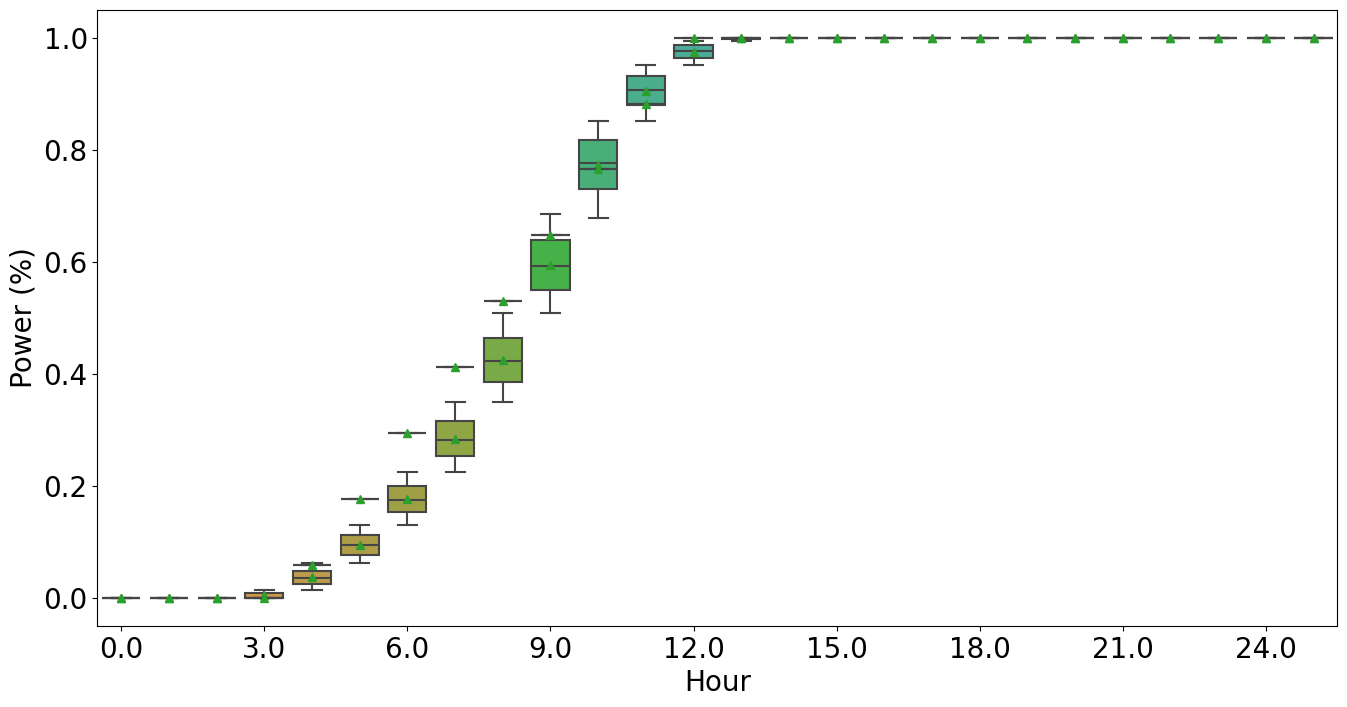

In [46]:
sns.boxplot( y=df_wind["Normalized"], x=df_wind["Wind Speed"], showmeans=True );
sns.boxplot( y=df_wind["Wind Turbine Power"], x=df_wind["Wind Speed"], showmeans=True );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(800, 1300, 30))
#plt.xticks(np.arange(0, 30, 1))
plt.gca().locator_params(nbins=10)
plt.show()

In [47]:


# Create a DataFrame from the plot data
df_max_values = pd.DataFrame()
df_max_values["Wind Speed"] = df_wind["Wind Speed"].unique()
df_max_values["Normalized"] = df_wind.groupby("Wind Speed")["Normalized"].max().values
df_max_values["Wind Turbine Power"] = df_wind.groupby("Wind Speed")["Wind Turbine Power"].max().values

df_max_values

Wind Speed  Normalized  Wind Turbine Power
0          5.0    0.000000            0.000000
1          6.0    0.000000            0.000000
2          7.0    0.000000            0.000000
3          8.0    0.014437            0.000000
4          4.0    0.061654            0.058824
5          3.0    0.130269            0.176471
6          9.0    0.223874            0.294118
7         10.0    0.349345            0.411765
8         11.0    0.507693            0.529412
9         12.0    0.685974            0.647059
10        13.0    0.851601            0.764706
11        14.0    0.950490            0.882353
12        15.0    0.994167            1.000000
13        16.0    1.000000            1.000000
14         2.0    1.000000            1.000000
15         1.0    1.000000            1.000000
16         0.0    1.000000            1.000000
17        17.0    1.000000            1.000000
18        18.0    1.000000            1.000000
19        19.0    1.000000            1.000000
20        20.0    1.000000            1.000000
21        22.0    1.000000            1.000000
22        21.0    1.000000            1.000000
23        23.0    1.000000            1.000000
24        24.0    1.000000            1.000000
25        25.0    1.000000            1.000000

In [48]:

# Calculate RMSE between the two columns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_max_values['Normalized'], df_max_values['Wind Turbine Power'])
print("Mean Absolute Error: ", mae)
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(df_max_values['Normalized'], df_max_values['Wind Turbine Power']))
print("Root Mean Squared Error: ", rmse)
percentage_error = abs((df_max_values['Normalized'] - df_max_values['Wind Turbine Power']) / df_max_values['Normalized']) * 100
mean_percentage_error = percentage_error.mean()
print("Mean percentage error: ", mean_percentage_error)

Mean Absolute Error:  0.016062684839347276
Root Mean Squared Error:  0.03125258242993396
Mean percentage error:  9.443948371271114


In [16]:
import matplotlib.pyplot as plt

# Filter the data for the desired date range
start_date = '2020-06-15'
end_date = '2020-06-16'
filtered_data = gen_1[(gen_1['DATE_TIME'] >= start_date) & (gen_1['DATE_TIME'] <= end_date)]

# Multiply all values of 'Solar Panel Power_07' column by 0.9
filtered_data['Solar Panel Power_07'] *= 0.9

# Plotting the graph
plt.plot(filtered_data['DATE_TIME'], filtered_data['Normalized_AC'], label='Без аккумулирования')
plt.plot(filtered_data['DATE_TIME'], filtered_data['Solar Panel Power_07'], label='С аккумулированием')

# Set plot title and labels
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')
plt.xlabel('Время, [час]')
plt.ylabel('Мощность, [от.ед]')
plt.xticks(rotation=45)

# Set ticks for every 1 hour
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='2H'))

# Set legends
plt.legend()

# Display the plot
plt.show()


NameError: name 'gen_1' is not defined

In [50]:
gen_2 = pd.ExcelFile('ikkteli.xlsx')
sheets = {sheet_name: gen_2.parse(sheet_name, header=None) for sheet_name in gen_2.sheet_names}
gen_2 = pd.concat(sheets.values(), ignore_index=True)
gen_2 = gen_2.iloc[1:]
gen_2.columns = ['DATE_TIME', 'Normalized_DC']



gen_2['Normalized_DC'] = pd.to_numeric(gen_2['Normalized_DC'], errors='coerce')
gen_2['Normalized_DC'] = (gen_2['Normalized_DC'])/(gen_2['Normalized_DC'].max())




gen_2[['year_month_hday','Hour_minute']] = gen_2['DATE_TIME'].astype(str).str.split(' ', expand=True).astype(str)
gen_2[['Hour','Minute','Second']] = gen_2['Hour_minute'].astype(str).str.split(':', expand=True).astype(str)
gen_2[['Year','Month','Day']] = gen_2['year_month_hday'].astype(str).str.split('-', expand=True).astype(str)
gen_2


gen_2

DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1      2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2      2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3      2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4      2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5      2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                    ...            ...             ...         ...  ...   
20225  2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226  2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227  2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228  2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229  2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  
1         55     00  2018    05  01  
2         00     00  2018    05  01  
3         15     00  2018    05  01  
4         30     00  2018    05  01  
5         45     00  2018    05  01  
...      ...    ...   ...   ...  ..  
20225     45     00  2019    05  31  
20226     00     00  2019    05  31  
20227     15     00  2019    05  31  
20228     30     00  2019    05  31  
20229     45     00  2019    05  31  

[20229 rows x 10 columns]

In [51]:
gen_2 = gen_2[gen_2['DATE_TIME'] != 'Tarih']
gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
gen_2

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\4056390633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'], errors='coerce', format='%Y-%m-%d %H:%M:%S')


DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1     2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2     2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3     2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4     2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5     2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                   ...            ...             ...         ...  ...   
20225 2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226 2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227 2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228 2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229 2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  
1         55     00  2018    05  01  
2         00     00  2018    05  01  
3         15     00  2018    05  01  
4         30     00  2018    05  01  
5         45     00  2018    05  01  
...      ...    ...   ...   ...  ..  
20225     45     00  2019    05  31  
20226     00     00  2019    05  31  
20227     15     00  2019    05  31  
20228     30     00  2019    05  31  
20229     45     00  2019    05  31  

[20220 rows x 10 columns]

In [52]:
latitude = 28
longitude = 28
gen_2.dropna(subset=['DATE_TIME'], inplace=True)
def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'])

gen_2['Zenith_Angle'] = gen_2['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
gen_2['Solar Panel Power'] = gen_2['Zenith_Angle'].apply(calculate_relative_power)    
gen_2['Solar Panel Power_07'] = gen_2['Zenith_Angle'].apply(calculate_relative_power)*0.9
gen_2  

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\1295011422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2.dropna(subset=['DATE_TIME'], inplace=True)
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\1295011422.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_13304\1295011422.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

DATE_TIME  Normalized_DC year_month_hday Hour_minute Hour  \
1     2018-05-01 04:55:00            0.0      2018-05-01    04:55:00   04   
2     2018-05-01 05:00:00            0.0      2018-05-01    05:00:00   05   
3     2018-05-01 05:15:00            0.0      2018-05-01    05:15:00   05   
4     2018-05-01 05:30:00            0.0      2018-05-01    05:30:00   05   
5     2018-05-01 05:45:00            0.0      2018-05-01    05:45:00   05   
...                   ...            ...             ...         ...  ...   
20225 2019-05-31 21:45:00            0.0      2019-05-31    21:45:00   21   
20226 2019-05-31 22:00:00            0.0      2019-05-31    22:00:00   22   
20227 2019-05-31 22:15:00            0.0      2019-05-31    22:15:00   22   
20228 2019-05-31 22:30:00            0.0      2019-05-31    22:30:00   22   
20229 2019-05-31 22:45:00            0.0      2019-05-31    22:45:00   22   

      Minute Second  Year Month Day  Zenith_Angle  Solar Panel Power  \
1         55     00  2018    05  01    104.598294                0.0   
2         00     00  2018    05  01    103.603907                0.0   
3         15     00  2018    05  01    100.586979                0.0   
4         30     00  2018    05  01     97.524136                0.0   
5         45     00  2018    05  01     94.420860                0.0   
...      ...    ...   ...   ...  ..           ...                ...   
20225     45     00  2019    05  31    114.839741                0.0   
20226     00     00  2019    05  31    117.105237                0.0   
20227     15     00  2019    05  31    119.240073                0.0   
20228     30     00  2019    05  31    121.229837                0.0   
20229     45     00  2019    05  31    123.059161                0.0   

       Solar Panel Power_07  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
5                       0.0  
...                     ...  
20225                   0.0  
20226                   0.0  
20227                   0.0  
20228                   0.0  
20229                   0.0  

[20219 rows x 13 columns]

In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(gen_2['Normalized_DC'], gen_2['Solar Panel Power'])
print("Mean Absolute Error: ", mae)



from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(gen_2['Normalized_DC'], gen_2['Solar Panel Power']))
print("Root Mean Squared Error: ", rmse)


percentage_error = abs((gen_2['Normalized_DC'] - gen_2['Solar Panel Power']) / gen_2['Normalized_DC']) * 100
mean_percentage_error = percentage_error.mean()
print("Mean percentage error: ", mean_percentage_error)

Mean Absolute Error:  0.21467062273286433
Root Mean Squared Error:  0.30342182141621404
Mean percentage error:  inf


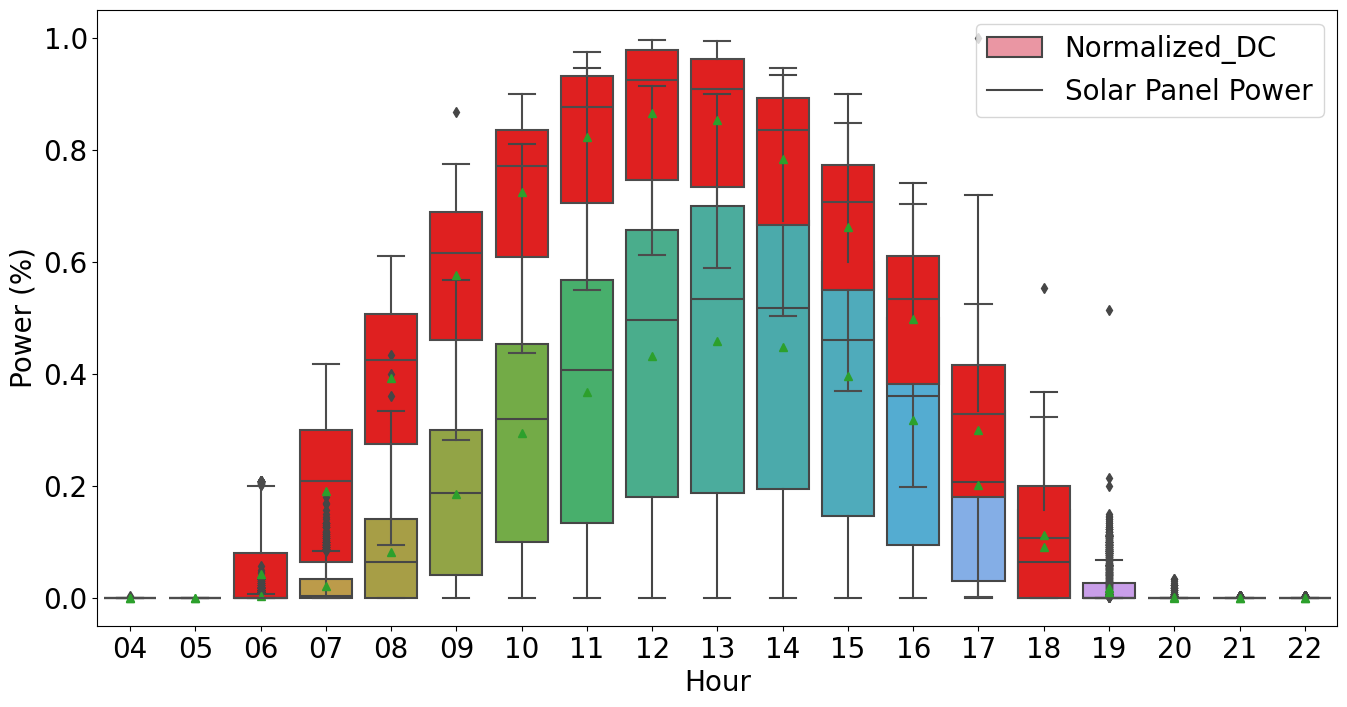

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_2['Normalized_DC'], x=gen_2['Hour'], showmeans=True)
sns.boxplot(y=gen_2['Solar Panel Power'], x=gen_2['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

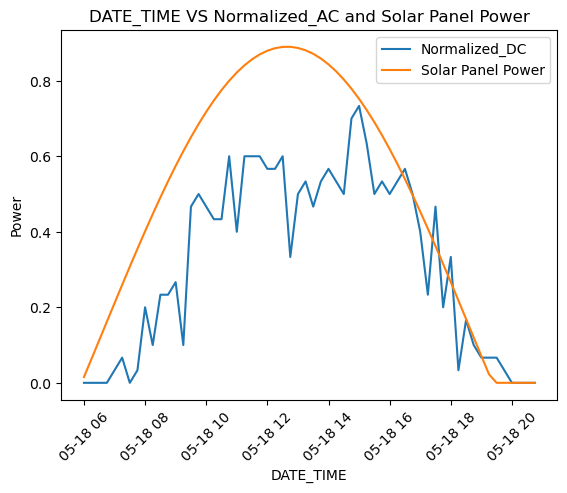

In [55]:
import matplotlib.pyplot as plt

# Filter the data for the desired date range
start_date = '2018-05-18'
end_date = '2018-05-19'
filtered_data = gen_2[(gen_2['DATE_TIME'] >= start_date) & (gen_2['DATE_TIME'] <= end_date)]

# Plotting the graph
plt.plot(filtered_data['DATE_TIME'], filtered_data['Normalized_DC'], label='Normalized_DC')
plt.plot(filtered_data['DATE_TIME'], filtered_data['Solar Panel Power_07'], label='Solar Panel Power')

# Set plot title and labels
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')
plt.xlabel('DATE_TIME')
plt.ylabel('Power')
plt.xticks(rotation=45)
# Set legends
plt.legend()

# Display the plot
plt.show()